In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.insert(0, os.path.dirname(os.path.abspath("")))

In [3]:
import rlcard
from rlcard.agents.dmc_agent import DMCTrainer
from rlcard.agents import RandomAgent, DQNAgent
from rlcard.agents.dmc_agent.model import DMCAgent

In [4]:
import tute.rlcard
from tute.rlcard.agent import TuteHumanAgent

In [5]:
import logging
tute.logger.setLevel(logging.INFO)

In [6]:
env = rlcard.make('tute')

In [7]:
print("Number of actions:", env.num_actions)
print("Number of players:", env.num_players)
print("Shape of state:", env.state_shape)
print("Shape of action:", env.action_shape)

Number of actions: 40
Number of players: 2
Shape of state: [[9, 41], [9, 41]]
Shape of action: [[40], [40]]


In [10]:
random_agent = RandomAgent(num_actions=env.num_actions)
human_agent = TuteHumanAgent(player=1, tute=env.game)

### Human vs Random

In [11]:
env.set_agents([human_agent, random_agent])

In [12]:
trajectories, player_wins = env.run(is_training=False)

Player 2 played el as de copas


================= Trump =================
el tres de copas


================ Face up ================
el as de copas


=============== Your Hand ===============
1: el cuatro de bastos
2: el dos de espadas
3: el cinco de oros
4: el siete de copas
5: el cinco de copas
6: el cinco de espadas
7: la sota de bastos


KeyboardInterrupt: Interrupted by user

In [45]:
player_wins

array([ 46, 104])

### Train Deep Q Network

In [23]:
dqn_agent = DQNAgent(
    num_actions=env.num_actions,
    state_shape=env.state_shape[0],
    mlp_layers=[64, 64],
)

In [24]:
env.set_agents([dqn_agent, dqn_agent])

In [25]:
from rlcard.utils import (
    tournament,
    reorganize,
    Logger,
    plot_curve,
)

In [26]:
with Logger(".") as logger:
    for episode in range(100000):

        # Generate data from the environment
        trajectories, payoffs = env.run(is_training=True)

        # Reorganaize the data to be state, action, reward, next_state, done
        trajectories = reorganize(trajectories, payoffs)

        # Feed transitions into agent memory, and train the agent
        for ts in trajectories[0]:
            dqn_agent.feed(ts)

        # Evaluate the performance.
        if episode % 50 == 0:
            logger.log_performance(
                env.timestep,
                tournament(
                    env,
                    100,
                )[0]
            )


----------------------------------------
  timestep     |  513684
  reward       |  56.81
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 100, rl-loss: 361.80242919921875
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 120, rl-loss: 0.5566394329071045

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 140, rl-loss: 339.8842468261719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 160, rl-loss: 123.23039245605469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 180, rl-loss: 663.8278198242188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 200, rl-loss: 0.49388784170150757

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 220, rl-loss: 145.73971557617188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 240, rl-loss: 616.8482666015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 260, rl-loss: 0.4894622564315796

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 280, rl-loss: 453.16571044921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 300, rl-loss: 1066.38916015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 320, rl-loss: 0.29441142082214355

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 340, rl-loss: 484.11004638671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 360, rl-loss: 450.3296203613281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 380, rl-loss: 241.8648223876953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 400, rl-loss: 677.4237670898438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 420, rl-loss: 356.50390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 440, rl-loss: 93.74578094482422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 460, rl-loss: 650.4490966796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 480, rl-loss: 584.8975830078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 500, rl-loss: 664.531494140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 520, rl-loss: 239.73251342773438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 540, rl-loss: 0.3584609031677246

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 560, rl-loss: 182.88522338867188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 580, rl-loss: 230.19337463378906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 600, rl-loss: 0.7638550400733948

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 620, rl-loss: 727.6053466796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 640, rl-loss: 193.18524169921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 660, rl-loss: 0.40207439661026

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 680, rl-loss: 175.9907989501953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 700, rl-loss: 0.3214227855205536

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 720, rl-loss: 121.45008850097656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 740, rl-loss: 180.78460693359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 760, rl-loss: 365.2788391113281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 780, rl-loss: 119.11016082763672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 800, rl-loss: 596.02685546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 820, rl-loss: 70.7371826171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 840, rl-loss: 1167.7926025390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 860, rl-loss: 360.0381774902344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 880, rl-loss: 232.92807006835938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 900, rl-loss: 154.6781463623047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 920, rl-loss: 9.409236907958984

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 940, rl-loss: 0.4664125442504883

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 960, rl-loss: 174.4802703857422

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 980, rl-loss: 300.7301330566406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1000, rl-loss: 539.6950073242188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1020, rl-loss: 296.633819580078123
----------------------------------------
  timestep     |  519611
  reward       |  64.15
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1040, rl-loss: 9.5240259170532236

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1060, rl-loss: 202.259613037109387

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1080, rl-loss: 200.2603302001953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1100, rl-loss: 118.47535705566406
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1120, rl-loss: 343.9450378417969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1140, rl-loss: 452.471923828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1160, rl-loss: 74.37936401367188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1180, rl-loss: 0.8928616046905518

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1200, rl-loss: 638.1143798828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1220, rl-loss: 213.79588317871094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1240, rl-loss: 536.1917114257812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1260, rl-loss: 353.3841552734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1280, rl-loss: 146.57456970214844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1300, rl-loss: 164.5358428955078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1320, rl-loss: 152.6727752685547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1340, rl-loss: 0.8200556039810181

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1360, rl-loss: 0.8910370469093323

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1380, rl-loss: 154.1612091064453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1400, rl-loss: 1.8844420909881592

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1420, rl-loss: 162.2923583984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1440, rl-loss: 244.0220184326172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1460, rl-loss: 179.9241485595703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1480, rl-loss: 175.83804321289062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1500, rl-loss: 244.58766174316406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1520, rl-loss: 763.2905883789062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1540, rl-loss: 1.1379750967025757

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1560, rl-loss: 193.0279541015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1580, rl-loss: 516.8516235351562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1600, rl-loss: 416.30780029296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1620, rl-loss: 156.95216369628906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1640, rl-loss: 155.10757446289062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1660, rl-loss: 386.7267761230469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1680, rl-loss: 1.1928458213806152

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1700, rl-loss: 0.9638193845748901

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1720, rl-loss: 1.1012556552886963

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1740, rl-loss: 1.003798484802246

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1760, rl-loss: 231.2560272216797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1780, rl-loss: 91.99111938476562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1800, rl-loss: 131.01400756835938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1820, rl-loss: 0.9343667030334473

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1840, rl-loss: 152.6066436767578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1860, rl-loss: 1.390354037284851

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1880, rl-loss: 296.7464599609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1900, rl-loss: 217.89862060546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1920, rl-loss: 128.3256378173828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1940, rl-loss: 1.4105019569396973

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1960, rl-loss: 842.3724365234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 1980, rl-loss: 0.6500571966171265

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2000, rl-loss: 172.51185607910156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2020, rl-loss: 197.33390808105475
----------------------------------------
  timestep     |  525541
  reward       |  59.74
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2040, rl-loss: 143.86463928222656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2060, rl-loss: 294.56781005859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2080, rl-loss: 53.6319465637207

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2100, rl-loss: 0.90093594789505
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2120, rl-loss: 1.34879469871521

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2140, rl-loss: 1.3565860986709595

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2160, rl-loss: 359.746826171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2180, rl-loss: 534.615234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2200, rl-loss: 64.67022705078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2220, rl-loss: 149.74539184570312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2240, rl-loss: 69.78292083740234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2260, rl-loss: 61.222652435302734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2280, rl-loss: 352.27398681640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2300, rl-loss: 117.44802856445312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2320, rl-loss: 1.8594437837600708

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2340, rl-loss: 166.9075927734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2360, rl-loss: 133.78421020507812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2380, rl-loss: 21.92782974243164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2400, rl-loss: 813.2960205078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2420, rl-loss: 601.1588134765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2440, rl-loss: 232.26319885253906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2460, rl-loss: 363.1761474609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2480, rl-loss: 84.1100845336914

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2500, rl-loss: 1.8217405080795288

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2520, rl-loss: 451.69189453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2540, rl-loss: 1.1616703271865845

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2560, rl-loss: 70.02200317382812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2580, rl-loss: 94.96437072753906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2600, rl-loss: 226.23312377929688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2620, rl-loss: 225.2451629638672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2640, rl-loss: 438.90692138671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2660, rl-loss: 415.9175109863281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2680, rl-loss: 1.1790390014648438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2700, rl-loss: 188.4199981689453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2720, rl-loss: 230.44345092773438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2740, rl-loss: 358.2418212890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2760, rl-loss: 636.9359130859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2780, rl-loss: 42.834373474121094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2800, rl-loss: 308.6844787597656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2820, rl-loss: 323.13812255859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2840, rl-loss: 87.07952117919922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2860, rl-loss: 1.0415539741516113

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2880, rl-loss: 637.9618530273438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2900, rl-loss: 1.1311957836151123

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2920, rl-loss: 0.9379444122314453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2940, rl-loss: 0.8298198580741882

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2960, rl-loss: 513.5935668945312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 2980, rl-loss: 209.3594970703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3000, rl-loss: 212.1836395263672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3020, rl-loss: 391.33056640625752
----------------------------------------
  timestep     |  531467
  reward       |  61.51
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3040, rl-loss: 0.6427760124206543

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3060, rl-loss: 109.16968536376953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3080, rl-loss: 569.2682495117188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3100, rl-loss: 239.22830200195312
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3120, rl-loss: 345.1887512207031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3140, rl-loss: 387.2234802246094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3160, rl-loss: 348.6802978515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3180, rl-loss: 197.87234497070312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3200, rl-loss: 393.0501403808594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3220, rl-loss: 242.33467102050786

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3240, rl-loss: 686.45153808593755

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3260, rl-loss: 239.34010314941406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3280, rl-loss: 415.55242919921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3300, rl-loss: 189.70884704589844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3320, rl-loss: 136.94390869140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3340, rl-loss: 1.1987113952636719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3360, rl-loss: 270.0975341796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3380, rl-loss: 36.646705627441406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3400, rl-loss: 202.9156494140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3420, rl-loss: 134.72067260742188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3440, rl-loss: 1.319092035293579

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3460, rl-loss: 274.97607421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3480, rl-loss: 1.2978650331497192

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3500, rl-loss: 710.0208740234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3520, rl-loss: 307.9306335449219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3540, rl-loss: 622.910400390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3560, rl-loss: 146.6109161376953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3580, rl-loss: 282.1744079589844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3600, rl-loss: 1.2171751260757446

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3620, rl-loss: 499.813232421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3640, rl-loss: 370.01116943359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3660, rl-loss: 1.1350483894348145

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3680, rl-loss: 175.07904052734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3700, rl-loss: 68.73049926757812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3720, rl-loss: 682.3087158203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3740, rl-loss: 1.3186664581298828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3760, rl-loss: 309.2484130859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3780, rl-loss: 349.50579833984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3800, rl-loss: 2.1317853927612305

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3820, rl-loss: 222.65699768066406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3840, rl-loss: 100.51268005371094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3860, rl-loss: 1.5343759059906006

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3880, rl-loss: 26.765148162841797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3900, rl-loss: 77.56535339355469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3920, rl-loss: 272.78106689453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3940, rl-loss: 90.99256896972656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3960, rl-loss: 376.9701843261719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 3980, rl-loss: 749.5421752929688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4000, rl-loss: 148.155029296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4020, rl-loss: 0.6222033500671387
----------------------------------------
  timestep     |  537392
  reward       |  60.45
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4040, rl-loss: 737.72552490234383

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4060, rl-loss: 110.19913482666016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4080, rl-loss: 146.23602294921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4100, rl-loss: 176.23672485351562
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4120, rl-loss: 1.653651475906372

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4140, rl-loss: 1.2797110080718994

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4160, rl-loss: 242.01844787597656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4180, rl-loss: 154.23666381835938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4200, rl-loss: 100.36508178710938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4220, rl-loss: 55.439144134521484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4240, rl-loss: 196.52850341796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4260, rl-loss: 589.1777954101562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4280, rl-loss: 313.35980224609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4300, rl-loss: 481.9111022949219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4320, rl-loss: 0.7458611726760864

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4340, rl-loss: 755.95703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4360, rl-loss: 104.59741973876953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4380, rl-loss: 392.88153076171875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4400, rl-loss: 0.5344370603561401

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4420, rl-loss: 104.76190948486328

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4440, rl-loss: 188.51876831054688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4460, rl-loss: 293.61090087890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4480, rl-loss: 54.769893646240234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4500, rl-loss: 59.62607192993164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4520, rl-loss: 32.32146072387695

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4540, rl-loss: 90.31652069091797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4560, rl-loss: 443.4168395996094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4580, rl-loss: 143.46022033691406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4600, rl-loss: 107.51593017578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4620, rl-loss: 143.04766845703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4640, rl-loss: 7.77296257019043

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4660, rl-loss: 273.41485595703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4680, rl-loss: 312.5977478027344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4700, rl-loss: 659.2186279296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4720, rl-loss: 0.9118492603302002

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4740, rl-loss: 183.9191131591797

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4760, rl-loss: 149.1166534423828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4780, rl-loss: 192.43405151367188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4800, rl-loss: 183.7169952392578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4820, rl-loss: 0.722231924533844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4840, rl-loss: 0.531805157661438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4860, rl-loss: 293.8182373046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4880, rl-loss: 1.731834053993225

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4900, rl-loss: 432.81427001953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4920, rl-loss: 178.37574768066406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4940, rl-loss: 135.67974853515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4960, rl-loss: 87.51510620117188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 4980, rl-loss: 229.7625274658203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5000, rl-loss: 109.27088928222656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5020, rl-loss: 284.74182128906257
----------------------------------------
  timestep     |  543321
  reward       |  59.04
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5040, rl-loss: 489.68649291992192

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5060, rl-loss: 397.27490234375625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5080, rl-loss: 88.989746093751875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5100, rl-loss: 610.234619140625
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5120, rl-loss: 328.0931701660156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5140, rl-loss: 240.86503601074227

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5160, rl-loss: 233.17552185058594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5180, rl-loss: 1.221632480621338

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5200, rl-loss: 180.90972900390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5220, rl-loss: 553.0925903320312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5240, rl-loss: 25.416868209838867

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5260, rl-loss: 654.5170288085938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5280, rl-loss: 431.0002136230469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5300, rl-loss: 118.30645751953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5320, rl-loss: 408.6451110839844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5340, rl-loss: 361.34747314453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5360, rl-loss: 340.731689453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5380, rl-loss: 398.2845458984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5400, rl-loss: 272.5555419921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5420, rl-loss: 167.89471435546875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5440, rl-loss: 324.4559020996094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5460, rl-loss: 334.580322265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5480, rl-loss: 337.1709289550781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5500, rl-loss: 379.5078430175781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5520, rl-loss: 54.97913360595703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5540, rl-loss: 160.20257568359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5560, rl-loss: 1.4669570922851562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5580, rl-loss: 175.97689819335938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5600, rl-loss: 43.38309860229492

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5620, rl-loss: 281.10980224609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5640, rl-loss: 304.6595764160156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5660, rl-loss: 0.7539496421813965

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5680, rl-loss: 78.84378051757812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5700, rl-loss: 457.1210632324219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5720, rl-loss: 287.625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5740, rl-loss: 168.2420196533203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5760, rl-loss: 213.13673400878906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5780, rl-loss: 106.78849792480469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5800, rl-loss: 1.2074387073516846

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5820, rl-loss: 231.06312561035156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5840, rl-loss: 15.93986988067627

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5860, rl-loss: 91.20542907714844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5880, rl-loss: 73.74169158935547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5900, rl-loss: 161.98468017578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5920, rl-loss: 1098.2978515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5940, rl-loss: 1.1517727375030518

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5960, rl-loss: 43.75581359863281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 5980, rl-loss: 354.7681884765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6000, rl-loss: 177.37152099609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6020, rl-loss: 171.85964965820312
----------------------------------------
  timestep     |  549253
  reward       |  61.7
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6040, rl-loss: 495.57135009765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6060, rl-loss: 1.1270688772201538

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6080, rl-loss: 388.3428955078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6100, rl-loss: 704.490478515625
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6120, rl-loss: 375.75921630859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6140, rl-loss: 82.25444793701172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6160, rl-loss: 1.0998401641845703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6180, rl-loss: 0.9784805774688721

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6200, rl-loss: 21.498584747314453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6220, rl-loss: 450.29815673828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6240, rl-loss: 7.328786849975586

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6260, rl-loss: 108.33637237548828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6280, rl-loss: 427.5386962890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6300, rl-loss: 258.3216247558594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6320, rl-loss: 131.3885498046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6340, rl-loss: 71.0218276977539

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6360, rl-loss: 152.51571655273438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6380, rl-loss: 134.4752960205078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6400, rl-loss: 0.9295198917388916

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6420, rl-loss: 888.0491333007812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6440, rl-loss: 141.6561737060547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6460, rl-loss: 2.96659779548645

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6480, rl-loss: 138.93890380859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6500, rl-loss: 171.010498046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6520, rl-loss: 80.36067962646484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6540, rl-loss: 0.6313679218292236

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6560, rl-loss: 151.4046630859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6580, rl-loss: 1.362185001373291

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6600, rl-loss: 89.53327941894531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6620, rl-loss: 114.07624816894531

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6640, rl-loss: 1.4477450847625732

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6660, rl-loss: 621.7640991210938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6680, rl-loss: 1.1067020893096924

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6700, rl-loss: 145.84654235839844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6720, rl-loss: 514.4609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6740, rl-loss: 229.17218017578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6760, rl-loss: 161.51409912109375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6780, rl-loss: 48.61122131347656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6800, rl-loss: 239.2951202392578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6820, rl-loss: 106.6438980102539

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6840, rl-loss: 1.6726198196411133

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6860, rl-loss: 50.37966537475586

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6880, rl-loss: 1.371207356452942

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6900, rl-loss: 118.7294692993164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6920, rl-loss: 717.201416015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6940, rl-loss: 108.32730102539062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6960, rl-loss: 148.21981811523438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 6980, rl-loss: 192.95034790039062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7000, rl-loss: 0.7740038633346558

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7020, rl-loss: 1.0519444942474365
----------------------------------------
  timestep     |  555183
  reward       |  56.24
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7040, rl-loss: 877.6808471679688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7060, rl-loss: 146.5699920654297

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7080, rl-loss: 179.30282592773438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7100, rl-loss: 1.6197152137756348
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7120, rl-loss: 631.0655517578125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7140, rl-loss: 344.9367370605469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7160, rl-loss: 329.8645324707031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7180, rl-loss: 590.177734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7200, rl-loss: 407.91217041015625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7220, rl-loss: 66.46163177490234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7240, rl-loss: 349.947998046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7260, rl-loss: 374.19683837890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7280, rl-loss: 59.421634674072266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7300, rl-loss: 375.66583251953125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7320, rl-loss: 227.9295196533203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7340, rl-loss: 1.3336429595947266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7360, rl-loss: 1.4096490144729614

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7380, rl-loss: 11.237248420715332

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7400, rl-loss: 176.0903778076172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7420, rl-loss: 535.4542236328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7440, rl-loss: 14.34189510345459

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7460, rl-loss: 66.10420989990234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7480, rl-loss: 257.22247314453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7500, rl-loss: 151.06109619140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7520, rl-loss: 76.37073516845703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7540, rl-loss: 345.19964599609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7560, rl-loss: 115.01039123535156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7580, rl-loss: 102.72882080078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7600, rl-loss: 5.943536758422852

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7620, rl-loss: 139.4378204345703

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7640, rl-loss: 130.44097900390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7660, rl-loss: 240.8004913330078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7680, rl-loss: 64.59107971191406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7700, rl-loss: 63.436378479003906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7720, rl-loss: 319.50677490234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7740, rl-loss: 275.84686279296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7760, rl-loss: 183.37933349609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7780, rl-loss: 121.77418518066406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7800, rl-loss: 294.5121765136719

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7820, rl-loss: 318.40283203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7840, rl-loss: 118.77239227294922

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7860, rl-loss: 102.1207504272461

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7880, rl-loss: 1.1439626216888428

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7900, rl-loss: 5.415806770324707

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7920, rl-loss: 1.1316616535186768

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7940, rl-loss: 42.68512725830078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7960, rl-loss: 514.2543334960938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 7980, rl-loss: 362.91876220703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8000, rl-loss: 60.9761848449707

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8020, rl-loss: 104.49468231201172
----------------------------------------
  timestep     |  561107
  reward       |  62.89
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8040, rl-loss: 108.1015396118164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8060, rl-loss: 402.2359619140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8080, rl-loss: 92.29367065429688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8100, rl-loss: 532.051513671875
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8120, rl-loss: 2.4475209712982178

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8140, rl-loss: 284.761474609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8160, rl-loss: 0.8324112892150879

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8180, rl-loss: 126.24639129638672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8200, rl-loss: 1.6770527362823486

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8220, rl-loss: 324.7496337890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8240, rl-loss: 1.3953049182891846

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8260, rl-loss: 120.78831481933594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8280, rl-loss: 1.6084625720977783

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8300, rl-loss: 1.2818106412887573

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8320, rl-loss: 280.6318664550781

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8340, rl-loss: 83.8079833984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8360, rl-loss: 115.04682159423828

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8380, rl-loss: 250.2316436767578

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8400, rl-loss: 256.8639221191406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8420, rl-loss: 74.96822357177734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8440, rl-loss: 211.99887084960938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8460, rl-loss: 520.4859619140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8480, rl-loss: 307.77691650390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8500, rl-loss: 177.41812133789062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8520, rl-loss: 671.7304077148438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8540, rl-loss: 363.83563232421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8560, rl-loss: 211.6941680908203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8580, rl-loss: 85.90251159667969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8600, rl-loss: 41.34698486328125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8620, rl-loss: 61.68892288208008

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8640, rl-loss: 286.84423828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8660, rl-loss: 264.4733581542969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8680, rl-loss: 197.89044189453125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8700, rl-loss: 55.409812927246094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8720, rl-loss: 55.656978607177734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8740, rl-loss: 128.3286895751953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8760, rl-loss: 82.59031677246094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8780, rl-loss: 132.97650146484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8800, rl-loss: 0.811963677406311

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8820, rl-loss: 494.5210876464844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8840, rl-loss: 54.34572982788086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8860, rl-loss: 411.76617431640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8880, rl-loss: 184.37892150878906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8900, rl-loss: 1.2661547660827637

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8920, rl-loss: 68.69268798828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8940, rl-loss: 65.66300201416016

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8960, rl-loss: 65.9476318359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 8980, rl-loss: 353.2109069824219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9000, rl-loss: 104.36724090576172

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9020, rl-loss: 3.0975108146667488
----------------------------------------
  timestep     |  567026
  reward       |  56.78
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9040, rl-loss: 103.11643981933594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9060, rl-loss: 0.6774119138717651

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9080, rl-loss: 103.8783950805664

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9100, rl-loss: 223.43991088867188
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9120, rl-loss: 2.553227424621582

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9140, rl-loss: 1.1569881439208984

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9160, rl-loss: 79.58781433105469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9180, rl-loss: 399.3874206542969

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9200, rl-loss: 234.02674865722656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9220, rl-loss: 293.5132141113281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9240, rl-loss: 288.8720703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9260, rl-loss: 1.284508228302002

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9280, rl-loss: 92.07547760009766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9300, rl-loss: 369.1410217285156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9320, rl-loss: 1.6812586784362793

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9340, rl-loss: 2.218014717102051

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9360, rl-loss: 283.422607421875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9380, rl-loss: 1.2587840557098389

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9400, rl-loss: 0.7703578472137451

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9420, rl-loss: 1.0832022428512573

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9440, rl-loss: 129.51161193847656

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9460, rl-loss: 34.647369384765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9480, rl-loss: 386.3443298339844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9500, rl-loss: 155.7542724609375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9520, rl-loss: 1.7079589366912842

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9540, rl-loss: 533.4681396484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9560, rl-loss: 345.21978759765625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9580, rl-loss: 115.00640869140625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9600, rl-loss: 214.36111450195312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9620, rl-loss: 112.23335266113281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9640, rl-loss: 575.8901977539062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9660, rl-loss: 707.985595703125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9680, rl-loss: 103.30855560302734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9700, rl-loss: 261.1795654296875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9720, rl-loss: 131.33116149902344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9740, rl-loss: 58.355106353759766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9760, rl-loss: 211.62974548339844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9780, rl-loss: 713.6224365234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9800, rl-loss: 80.48926544189453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9820, rl-loss: 109.57821655273438

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9840, rl-loss: 264.3755187988281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9860, rl-loss: 188.84152221679688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9880, rl-loss: 147.92298889160156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9900, rl-loss: 54.57865524291992

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9920, rl-loss: 167.291748046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9940, rl-loss: 164.42759704589844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9960, rl-loss: 3.440932512283325

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 9980, rl-loss: 622.5748901367188

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10000, rl-loss: 60.692447662353516

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10020, rl-loss: 287.04537963867196
----------------------------------------
  timestep     |  572945
  reward       |  64.5
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10040, rl-loss: 166.68524169921875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10060, rl-loss: 77.5452880859375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10080, rl-loss: 482.5169372558594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10100, rl-loss: 56.32319259643555
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10120, rl-loss: 280.53955078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10140, rl-loss: 209.94070434570312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10160, rl-loss: 1.7126784324645996

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10180, rl-loss: 368.14971923828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10200, rl-loss: 131.31068420410156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10220, rl-loss: 1.3451541662216187

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10240, rl-loss: 1.5202381610870361

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10260, rl-loss: 810.9193725585938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10280, rl-loss: 3.325918674468994

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10300, rl-loss: 2.2833070755004883

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10320, rl-loss: 390.6551513671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10340, rl-loss: 1.693007469177246

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10360, rl-loss: 124.49784851074219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10380, rl-loss: 2.2447805404663086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10400, rl-loss: 120.91548919677734

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10420, rl-loss: 63.215850830078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10440, rl-loss: 155.91221618652344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10460, rl-loss: 175.1304931640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10480, rl-loss: 377.0552062988281

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10500, rl-loss: 87.25340270996094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10520, rl-loss: 72.28150939941406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10540, rl-loss: 2.4919700622558594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10560, rl-loss: 3.88582181930542

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10580, rl-loss: 849.6768798828125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10600, rl-loss: 179.45916748046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10620, rl-loss: 186.18136596679688

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10640, rl-loss: 517.65087890625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10660, rl-loss: 39.0446662902832

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10680, rl-loss: 265.66796875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10700, rl-loss: 209.13314819335938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10720, rl-loss: 448.9074401855469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10740, rl-loss: 185.06134033203125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10760, rl-loss: 46.222862243652344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10780, rl-loss: 109.82756042480469

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10800, rl-loss: 23.413501739501953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10820, rl-loss: 78.27159118652344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10840, rl-loss: 143.0291748046875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10860, rl-loss: 89.25321197509766

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10880, rl-loss: 160.66139221191406

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10900, rl-loss: 96.43876647949219

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10920, rl-loss: 31.977834701538086

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10940, rl-loss: 38.242855072021484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10960, rl-loss: 1.138167142868042

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 10980, rl-loss: 180.64561462402344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11000, rl-loss: 299.00054931640625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11020, rl-loss: 342.95574951171875
----------------------------------------
  timestep     |  578880
  reward       |  62.81
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11040, rl-loss: 2.7723000049591064

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 11051, rl-loss: 1.1696784496307373
----------------------------------------
  timestep     |  584816
  reward       |  64.53
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12040, rl-loss: 160.41859436035156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12060, rl-loss: 1.4536092281341553

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12080, rl-loss: 215.53636169433594

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12100, rl-loss: 544.2499389648438
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12120, rl-loss: 277.364013671875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12140, rl-loss: 2.833062171936035

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12160, rl-loss: 4.40628719329834

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12180, rl-loss: 17.059526443481445

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12200, rl-loss: 357.6029052734375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12220, rl-loss: 1.5394222736358643

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12240, rl-loss: 15.692930221557617

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 12260, rl-loss: 277.80413818359375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14020, rl-loss: 215.33749389648438
----------------------------------------
  timestep     |  596655
  reward       |  64.28
----------------------------------------


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14040, rl-loss: 102.89649200439453

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14060, rl-loss: 251.66514587402344

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14080, rl-loss: 98.9833755493164

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14100, rl-loss: 129.26109313964844
INFO - Copied model parameters to target network.


/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14120, rl-loss: 51.00379180908203

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14140, rl-loss: 363.9308166503906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14160, rl-loss: 2.1853744983673096

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14180, rl-loss: 336.93646240234375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14200, rl-loss: 4.639616966247559

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14220, rl-loss: 25.47507667541504

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14240, rl-loss: 334.5542907714844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14260, rl-loss: 124.8563003540039

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14280, rl-loss: 182.88021850585938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14300, rl-loss: 302.26568603515625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14320, rl-loss: 7.302694320678711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14340, rl-loss: 86.49788665771484

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14360, rl-loss: 104.41214752197266

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14380, rl-loss: 335.5835876464844

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14400, rl-loss: 538.5775146484375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14420, rl-loss: 57.006980895996094

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14440, rl-loss: 244.24171447753906

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14460, rl-loss: 120.89697265625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14480, rl-loss: 338.875

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14500, rl-loss: 7.023734092712402

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14520, rl-loss: 148.67022705078125

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14540, rl-loss: 6.119352340698242

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14560, rl-loss: 4.460409164428711

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14580, rl-loss: 114.82112121582031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14600, rl-loss: 119.63838958740234

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14620, rl-loss: 227.7509002685547

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14640, rl-loss: 196.2505645751953

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14660, rl-loss: 210.00393676757812

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14680, rl-loss: 184.71029663085938

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14700, rl-loss: 146.35269165039062

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14720, rl-loss: 3.3855345249176025

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14740, rl-loss: 37.96603012084961

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14760, rl-loss: 31.736064910888672

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14780, rl-loss: 376.90032958984375

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14800, rl-loss: 169.94879150390625

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14820, rl-loss: 228.9049835205078

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14840, rl-loss: 1.3905689716339111

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14860, rl-loss: 173.66336059570312

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14880, rl-loss: 255.99867248535156

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14900, rl-loss: 232.1263885498047

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14920, rl-loss: 6.476334571838379

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14940, rl-loss: 55.69465637207031

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14960, rl-loss: 7.628584861755371

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 14980, rl-loss: 206.91397094726562

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15000, rl-loss: 2.272188663482666

/home/teticio/.local/share/virtualenvs/huggingface-OfWfm_Zx/lib/python3.10/site-packages/rlcard/agents/dqn_agent.py:194: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state_batch, action_batch, reward_batch, next_state_batch, legal_actions_batch, done_batch = self.memory.sample()


INFO - Step 15020, rl-loss: 147.13398742675785
Logs saved in .


KeyboardInterrupt: 

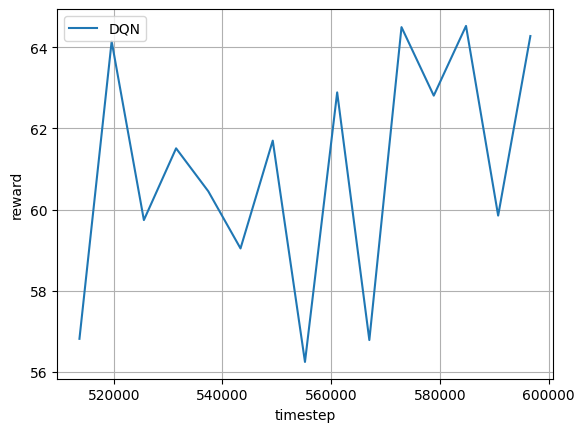

In [27]:
csv_path, fig_path = logger.csv_path, logger.fig_path
plot_curve(csv_path, fig_path, "DQN")

In [28]:
wins = 0
env.set_agents([dqn_agent, random_agent])
for n in range(50):
    trajectories, player_wins = env.run(is_training=False)
    if player_wins[0] > player_wins[1]:
        wins += 1
env.set_agents([random_agent, dqn_agent])
for n in range(50):
    trajectories, player_wins = env.run(is_training=False)
    if player_wins[1] > player_wins[0]:
        wins += 1
wins / 100

0.44

In [22]:
env.set_agents([dqn_agent, human_agent])
trajectories, player_wins = env.run(is_training=False)

Player 2 swapped el tres de copas for el dos de copas
Player 1 played la sota de copas


================= Trump =================
el dos de copas


================ Face up ================
la sota de copas


=============== Your Hand ===============
1: la sota de bastos
2: el cuatro de bastos
3: el tres de oros
4: el cinco de oros
5: la sota de espadas
6: el as de bastos
7: el cuatro de oros
8: el tres de copas
1  2  3  4  5  6  7  8 ? 2

Player 2 played el cuatro de bastos
Player 1 won trick
Player 1 played el cuatro de espadas


================= Trump =================
el dos de copas


================ Face up ================
el cuatro de espadas


=============== Your Hand ===============
1: la sota de bastos
2: el tres de oros
3: el cinco de oros
4: la sota de espadas
5: el as de bastos
6: el cuatro de oros
7: el tres de copas
8: el seis de oros
1  2  3  4  5  6  7  8 ? 4

Player 2 played la sota de espadas
Player 2 won trick


================= Trump =================
el dos 

In [23]:
player_wins

array([ 59, 111])

### Train Deep Monte Carlo model

In [ ]:
env = rlcard.make('tute')
# Initialize the DMC trainer
trainer = DMCTrainer(
    env,
    cuda="cuda",
    xpid="tute",
    savedir="dmc_results",
    save_interval=1,
)

In [8]:
# Train DMC Agents
trainer.start()

Creating log directory: dmc_results/tute
INFO:palaas/out:Creating log directory: dmc_results/tute
Saving arguments to dmc_results/tute/meta.json
INFO:palaas/out:Saving arguments to dmc_results/tute/meta.json
Saving messages to dmc_results/tute/out.log
INFO:palaas/out:Saving messages to dmc_results/tute/out.log
Saving logs data to dmc_results/tute/logs.csv
INFO:palaas/out:Saving logs data to dmc_results/tute/logs.csv
Saving logs' fields to dmc_results/tute/fields.csv
INFO:palaas/out:Saving logs' fields to dmc_results/tute/fields.csv
[INFO:417927 utils:108 2022-09-17 12:20:32,308] Device 0 Actor 2 started.
[INFO:417894 utils:108 2022-09-17 12:20:32,314] Device 0 Actor 0 started.
[INFO:417897 utils:108 2022-09-17 12:20:32,344] Device 0 Actor 1 started.
[INFO:417991 utils:108 2022-09-17 12:20:32,461] Device 0 Actor 4 started.
[INFO:417959 utils:108 2022-09-17 12:20:32,468] Device 0 Actor 3 started.
[INFO:417825 trainer:335 2022-09-17 12:20:35,943] Saving checkpoint to dmc_results/tute/mode

[INFO:417825 trainer:367 2022-09-17 12:23:06,347] After 67200 frames: @ 639.4 fps Stats:
{'loss_0': 1348.5743408203125,
 'loss_1': 4351.015625,
 'mean_episode_return_0': 59.885799407958984,
 'mean_episode_return_1': 80.9089584350586}
[INFO:417825 trainer:367 2022-09-17 12:23:11,351] After 70400 frames: @ 639.6 fps Stats:
{'loss_0': 1348.5743408203125,
 'loss_1': 2665.51123046875,
 'mean_episode_return_0': 59.885799407958984,
 'mean_episode_return_1': 80.99018859863281}
[INFO:417825 trainer:367 2022-09-17 12:23:16,356] After 70400 frames: @ 0.0 fps Stats:
{'loss_0': 1348.5743408203125,
 'loss_1': 2665.51123046875,
 'mean_episode_return_0': 59.885799407958984,
 'mean_episode_return_1': 80.99018859863281}
[INFO:417825 trainer:367 2022-09-17 12:23:21,360] After 73600 frames: @ 639.7 fps Stats:
{'loss_0': 854.1663818359375,
 'loss_1': 2665.51123046875,
 'mean_episode_return_0': 59.92812728881836,
 'mean_episode_return_1': 80.99018859863281}
[INFO:417825 trainer:367 2022-09-17 12:23:26,366] 

[INFO:417825 trainer:367 2022-09-17 12:25:56,736] After 144000 frames: @ 639.7 fps Stats:
{'loss_0': 610.1395874023438,
 'loss_1': 475.06536865234375,
 'mean_episode_return_0': 59.82853317260742,
 'mean_episode_return_1': 80.87250518798828}
[INFO:417825 trainer:367 2022-09-17 12:26:01,740] After 147200 frames: @ 639.6 fps Stats:
{'loss_0': 610.1395874023438,
 'loss_1': 716.870849609375,
 'mean_episode_return_0': 59.82853317260742,
 'mean_episode_return_1': 80.73091125488281}
[INFO:417825 trainer:367 2022-09-17 12:26:06,744] After 147200 frames: @ 0.0 fps Stats:
{'loss_0': 610.1395874023438,
 'loss_1': 716.870849609375,
 'mean_episode_return_0': 59.82853317260742,
 'mean_episode_return_1': 80.73091125488281}
[INFO:417825 trainer:367 2022-09-17 12:26:11,748] After 150400 frames: @ 639.6 fps Stats:
{'loss_0': 530.1473999023438,
 'loss_1': 716.870849609375,
 'mean_episode_return_0': 59.78411865234375,
 'mean_episode_return_1': 80.73091125488281}
[INFO:417825 trainer:367 2022-09-17 12:26:16

[INFO:417825 trainer:367 2022-09-17 12:28:47,134] After 220800 frames: @ 0.0 fps Stats:
{'loss_0': 442.8182678222656,
 'loss_1': 440.5427551269531,
 'mean_episode_return_0': 60.31071472167969,
 'mean_episode_return_1': 78.21005249023438}
[INFO:417825 trainer:367 2022-09-17 12:28:52,139] After 220800 frames: @ 0.0 fps Stats:
{'loss_0': 442.8182678222656,
 'loss_1': 440.5427551269531,
 'mean_episode_return_0': 60.31071472167969,
 'mean_episode_return_1': 78.21005249023438}
[INFO:417825 trainer:367 2022-09-17 12:28:57,145] After 227200 frames: @ 1278.7 fps Stats:
{'loss_0': 318.6097106933594,
 'loss_1': 389.4335021972656,
 'mean_episode_return_0': 60.31528091430664,
 'mean_episode_return_1': 78.09669494628906}
[INFO:417825 trainer:367 2022-09-17 12:29:02,151] After 227200 frames: @ 0.0 fps Stats:
{'loss_0': 318.6097106933594,
 'loss_1': 389.4335021972656,
 'mean_episode_return_0': 60.31528091430664,
 'mean_episode_return_1': 78.09669494628906}
[INFO:417825 trainer:367 2022-09-17 12:29:07,

[INFO:417825 trainer:335 2022-09-17 12:31:37,486] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 12:31:37,559] After 297600 frames: @ 0.0 fps Stats:
{'loss_0': 341.65460205078125,
 'loss_1': 372.32318115234375,
 'mean_episode_return_0': 60.50545120239258,
 'mean_episode_return_1': 76.6648941040039}
[INFO:417825 trainer:367 2022-09-17 12:31:42,565] After 304000 frames: @ 1278.7 fps Stats:
{'loss_0': 332.5693664550781,
 'loss_1': 488.8091735839844,
 'mean_episode_return_0': 60.50482177734375,
 'mean_episode_return_1': 76.62098693847656}
[INFO:417825 trainer:367 2022-09-17 12:31:47,568] After 304000 frames: @ 0.0 fps Stats:
{'loss_0': 332.5693664550781,
 'loss_1': 488.8091735839844,
 'mean_episode_return_0': 60.50482177734375,
 'mean_episode_return_1': 76.62098693847656}
[INFO:417825 trainer:367 2022-09-17 12:31:52,574] After 307200 frames: @ 639.4 fps Stats:
{'loss_0': 355.0056457519531,
 'loss_1': 488.8091735839844,
 'mean_episode_return_0': 60.53711

[INFO:417825 trainer:367 2022-09-17 12:34:22,916] After 377600 frames: @ 639.6 fps Stats:
{'loss_0': 318.2760925292969,
 'loss_1': 371.8299255371094,
 'mean_episode_return_0': 60.70490264892578,
 'mean_episode_return_1': 75.57117462158203}
[INFO:417825 trainer:367 2022-09-17 12:34:27,921] After 380800 frames: @ 639.4 fps Stats:
{'loss_0': 318.2760925292969,
 'loss_1': 338.0424499511719,
 'mean_episode_return_0': 60.70490264892578,
 'mean_episode_return_1': 75.45771026611328}
[INFO:417825 trainer:367 2022-09-17 12:34:32,924] After 380800 frames: @ 0.0 fps Stats:
{'loss_0': 318.2760925292969,
 'loss_1': 338.0424499511719,
 'mean_episode_return_0': 60.70490264892578,
 'mean_episode_return_1': 75.45771026611328}
[INFO:417825 trainer:335 2022-09-17 12:34:37,927] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 12:34:37,997] After 384000 frames: @ 630.8 fps Stats:
{'loss_0': 348.6032409667969,
 'loss_1': 338.0424499511719,
 'mean_episode_return_0': 60.73780

[INFO:417825 trainer:367 2022-09-17 12:37:13,344] After 457600 frames: @ 639.4 fps Stats:
{'loss_0': 261.3167419433594,
 'loss_1': 366.18072509765625,
 'mean_episode_return_0': 60.91145706176758,
 'mean_episode_return_1': 74.56596374511719}
[INFO:417825 trainer:367 2022-09-17 12:37:18,348] After 460800 frames: @ 639.6 fps Stats:
{'loss_0': 314.5307922363281,
 'loss_1': 366.18072509765625,
 'mean_episode_return_0': 60.921661376953125,
 'mean_episode_return_1': 74.56596374511719}
[INFO:417825 trainer:367 2022-09-17 12:37:23,354] After 460800 frames: @ 0.0 fps Stats:
{'loss_0': 314.5307922363281,
 'loss_1': 366.18072509765625,
 'mean_episode_return_0': 60.921661376953125,
 'mean_episode_return_1': 74.56596374511719}
[INFO:417825 trainer:367 2022-09-17 12:37:28,360] After 464000 frames: @ 639.4 fps Stats:
{'loss_0': 314.5307922363281,
 'loss_1': 390.451171875,
 'mean_episode_return_0': 60.921661376953125,
 'mean_episode_return_1': 74.55288696289062}
[INFO:417825 trainer:367 2022-09-17 12:3

[INFO:417825 trainer:367 2022-09-17 12:40:03,788] After 537600 frames: @ 639.6 fps Stats:
{'loss_0': 307.7543640136719,
 'loss_1': 407.9398498535156,
 'mean_episode_return_0': 61.196617126464844,
 'mean_episode_return_1': 74.07908630371094}
[INFO:417825 trainer:367 2022-09-17 12:40:08,792] After 537600 frames: @ 0.0 fps Stats:
{'loss_0': 307.7543640136719,
 'loss_1': 407.9398498535156,
 'mean_episode_return_0': 61.196617126464844,
 'mean_episode_return_1': 74.07908630371094}
[INFO:417825 trainer:367 2022-09-17 12:40:13,796] After 544000 frames: @ 1279.1 fps Stats:
{'loss_0': 296.3932189941406,
 'loss_1': 329.7781066894531,
 'mean_episode_return_0': 61.197235107421875,
 'mean_episode_return_1': 74.05258178710938}
[INFO:417825 trainer:367 2022-09-17 12:40:18,802] After 544000 frames: @ 0.0 fps Stats:
{'loss_0': 296.3932189941406,
 'loss_1': 329.7781066894531,
 'mean_episode_return_0': 61.197235107421875,
 'mean_episode_return_1': 74.05258178710938}
[INFO:417825 trainer:367 2022-09-17 12:

[INFO:417825 trainer:367 2022-09-17 12:42:54,231] After 614400 frames: @ 0.0 fps Stats:
{'loss_0': 264.1239318847656,
 'loss_1': 282.355712890625,
 'mean_episode_return_0': 61.34890365600586,
 'mean_episode_return_1': 73.60498809814453}
[INFO:417825 trainer:367 2022-09-17 12:42:59,236] After 617600 frames: @ 639.6 fps Stats:
{'loss_0': 297.7020263671875,
 'loss_1': 282.355712890625,
 'mean_episode_return_0': 61.407203674316406,
 'mean_episode_return_1': 73.60498809814453}
[INFO:417825 trainer:367 2022-09-17 12:43:04,242] After 620800 frames: @ 639.4 fps Stats:
{'loss_0': 297.7020263671875,
 'loss_1': 283.24560546875,
 'mean_episode_return_0': 61.407203674316406,
 'mean_episode_return_1': 73.57015991210938}
[INFO:417825 trainer:367 2022-09-17 12:43:09,247] After 620800 frames: @ 0.0 fps Stats:
{'loss_0': 297.7020263671875,
 'loss_1': 283.24560546875,
 'mean_episode_return_0': 61.407203674316406,
 'mean_episode_return_1': 73.57015991210938}
[INFO:417825 trainer:367 2022-09-17 12:43:14,25

[INFO:417825 trainer:367 2022-09-17 12:45:44,661] After 694400 frames: @ 639.4 fps Stats:
{'loss_0': 322.83953857421875,
 'loss_1': 335.7108459472656,
 'mean_episode_return_0': 61.670623779296875,
 'mean_episode_return_1': 72.80419921875}
[INFO:417825 trainer:367 2022-09-17 12:45:49,667] After 697600 frames: @ 639.4 fps Stats:
{'loss_0': 322.83953857421875,
 'loss_1': 314.81878662109375,
 'mean_episode_return_0': 61.670623779296875,
 'mean_episode_return_1': 72.73818969726562}
[INFO:417825 trainer:367 2022-09-17 12:45:54,671] After 700800 frames: @ 639.6 fps Stats:
{'loss_0': 263.1881103515625,
 'loss_1': 314.81878662109375,
 'mean_episode_return_0': 61.70893478393555,
 'mean_episode_return_1': 72.73818969726562}
[INFO:417825 trainer:367 2022-09-17 12:45:59,677] After 700800 frames: @ 0.0 fps Stats:
{'loss_0': 263.1881103515625,
 'loss_1': 314.81878662109375,
 'mean_episode_return_0': 61.70893478393555,
 'mean_episode_return_1': 72.73818969726562}
[INFO:417825 trainer:367 2022-09-17 12

[INFO:417825 trainer:367 2022-09-17 12:48:35,012] After 771200 frames: @ 0.0 fps Stats:
{'loss_0': 304.9992370605469,
 'loss_1': 393.9615478515625,
 'mean_episode_return_0': 62.10443878173828,
 'mean_episode_return_1': 71.5206069946289}
[INFO:417825 trainer:335 2022-09-17 12:48:40,016] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 12:48:40,095] After 777600 frames: @ 1259.2 fps Stats:
{'loss_0': 259.2247314453125,
 'loss_1': 375.7250671386719,
 'mean_episode_return_0': 62.073123931884766,
 'mean_episode_return_1': 71.48577117919922}
[INFO:417825 trainer:367 2022-09-17 12:48:45,100] After 777600 frames: @ 0.0 fps Stats:
{'loss_0': 259.2247314453125,
 'loss_1': 375.7250671386719,
 'mean_episode_return_0': 62.073123931884766,
 'mean_episode_return_1': 71.48577117919922}
[INFO:417825 trainer:367 2022-09-17 12:48:50,104] After 780800 frames: @ 639.6 fps Stats:
{'loss_0': 259.2247314453125,
 'loss_1': 405.572021484375,
 'mean_episode_return_0': 62.073123

[INFO:417825 trainer:367 2022-09-17 12:51:25,433] After 854400 frames: @ 1278.7 fps Stats:
{'loss_0': 279.3696594238281,
 'loss_1': 299.05706787109375,
 'mean_episode_return_0': 62.26262664794922,
 'mean_episode_return_1': 71.3284912109375}
[INFO:417825 trainer:367 2022-09-17 12:51:30,439] After 854400 frames: @ 0.0 fps Stats:
{'loss_0': 279.3696594238281,
 'loss_1': 299.05706787109375,
 'mean_episode_return_0': 62.26262664794922,
 'mean_episode_return_1': 71.3284912109375}
[INFO:417825 trainer:367 2022-09-17 12:51:35,445] After 854400 frames: @ 0.0 fps Stats:
{'loss_0': 279.3696594238281,
 'loss_1': 299.05706787109375,
 'mean_episode_return_0': 62.26262664794922,
 'mean_episode_return_1': 71.3284912109375}
[INFO:417825 trainer:335 2022-09-17 12:51:40,451] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 12:51:40,543] After 860800 frames: @ 1255.7 fps Stats:
{'loss_0': 270.51080322265625,
 'loss_1': 309.8444519042969,
 'mean_episode_return_0': 62.2722

[INFO:417825 trainer:367 2022-09-17 12:54:15,894] After 931200 frames: @ 639.4 fps Stats:
{'loss_0': 295.61798095703125,
 'loss_1': 305.8628845214844,
 'mean_episode_return_0': 62.67593765258789,
 'mean_episode_return_1': 71.263916015625}
[INFO:417825 trainer:367 2022-09-17 12:54:20,898] After 931200 frames: @ 0.0 fps Stats:
{'loss_0': 295.61798095703125,
 'loss_1': 305.8628845214844,
 'mean_episode_return_0': 62.67593765258789,
 'mean_episode_return_1': 71.263916015625}
[INFO:417825 trainer:367 2022-09-17 12:54:25,904] After 934400 frames: @ 639.4 fps Stats:
{'loss_0': 273.02752685546875,
 'loss_1': 305.8628845214844,
 'mean_episode_return_0': 62.69024658203125,
 'mean_episode_return_1': 71.263916015625}
[INFO:417825 trainer:367 2022-09-17 12:54:30,910] After 937600 frames: @ 639.4 fps Stats:
{'loss_0': 273.02752685546875,
 'loss_1': 400.92242431640625,
 'mean_episode_return_0': 62.69024658203125,
 'mean_episode_return_1': 71.29999542236328}
[INFO:417825 trainer:367 2022-09-17 12:54:3

[INFO:417825 trainer:367 2022-09-17 12:57:06,312] After 1011200 frames: @ 639.6 fps Stats:
{'loss_0': 295.14642333984375,
 'loss_1': 308.8255310058594,
 'mean_episode_return_0': 63.04924774169922,
 'mean_episode_return_1': 71.4322509765625}
[INFO:417825 trainer:367 2022-09-17 12:57:11,318] After 1011200 frames: @ 0.0 fps Stats:
{'loss_0': 295.14642333984375,
 'loss_1': 308.8255310058594,
 'mean_episode_return_0': 63.04924774169922,
 'mean_episode_return_1': 71.4322509765625}
[INFO:417825 trainer:367 2022-09-17 12:57:16,324] After 1014400 frames: @ 639.4 fps Stats:
{'loss_0': 295.14642333984375,
 'loss_1': 296.62530517578125,
 'mean_episode_return_0': 63.04924774169922,
 'mean_episode_return_1': 71.4481430053711}
[INFO:417825 trainer:367 2022-09-17 12:57:21,329] After 1017600 frames: @ 639.4 fps Stats:
{'loss_0': 293.82232666015625,
 'loss_1': 296.62530517578125,
 'mean_episode_return_0': 63.0422477722168,
 'mean_episode_return_1': 71.4481430053711}
[INFO:417825 trainer:367 2022-09-17 1

[INFO:417825 trainer:367 2022-09-17 12:59:56,780] After 1088000 frames: @ 0.0 fps Stats:
{'loss_0': 350.7405090332031,
 'loss_1': 345.4025573730469,
 'mean_episode_return_0': 63.34756088256836,
 'mean_episode_return_1': 71.93046569824219}
[INFO:417825 trainer:367 2022-09-17 13:00:01,786] After 1094400 frames: @ 1278.7 fps Stats:
{'loss_0': 299.1362609863281,
 'loss_1': 326.2107849121094,
 'mean_episode_return_0': 63.35006332397461,
 'mean_episode_return_1': 72.003173828125}
[INFO:417825 trainer:367 2022-09-17 13:00:06,792] After 1094400 frames: @ 0.0 fps Stats:
{'loss_0': 299.1362609863281,
 'loss_1': 326.2107849121094,
 'mean_episode_return_0': 63.35006332397461,
 'mean_episode_return_1': 72.003173828125}
[INFO:417825 trainer:367 2022-09-17 13:00:11,797] After 1094400 frames: @ 0.0 fps Stats:
{'loss_0': 299.1362609863281,
 'loss_1': 326.2107849121094,
 'mean_episode_return_0': 63.35006332397461,
 'mean_episode_return_1': 72.003173828125}
[INFO:417825 trainer:367 2022-09-17 13:00:16,80

[INFO:417825 trainer:367 2022-09-17 13:02:42,236] After 1168000 frames: @ 627.0 fps Stats:
{'loss_0': 294.1035461425781,
 'loss_1': 326.1039123535156,
 'mean_episode_return_0': 63.68099594116211,
 'mean_episode_return_1': 72.36719512939453}
[INFO:417825 trainer:367 2022-09-17 13:02:47,240] After 1171200 frames: @ 639.7 fps Stats:
{'loss_0': 294.1035461425781,
 'loss_1': 338.3587951660156,
 'mean_episode_return_0': 63.68099594116211,
 'mean_episode_return_1': 72.38633728027344}
[INFO:417825 trainer:367 2022-09-17 13:02:52,244] After 1171200 frames: @ 0.0 fps Stats:
{'loss_0': 294.1035461425781,
 'loss_1': 338.3587951660156,
 'mean_episode_return_0': 63.68099594116211,
 'mean_episode_return_1': 72.38633728027344}
[INFO:417825 trainer:367 2022-09-17 13:02:57,250] After 1174400 frames: @ 639.4 fps Stats:
{'loss_0': 341.66851806640625,
 'loss_1': 338.3587951660156,
 'mean_episode_return_0': 63.769622802734375,
 'mean_episode_return_1': 72.38633728027344}
[INFO:417825 trainer:367 2022-09-17 

[INFO:417825 trainer:367 2022-09-17 13:05:32,612] After 1248000 frames: @ 639.6 fps Stats:
{'loss_0': 326.7840576171875,
 'loss_1': 420.2825622558594,
 'mean_episode_return_0': 64.40325164794922,
 'mean_episode_return_1': 72.74768829345703}
[INFO:417825 trainer:367 2022-09-17 13:05:37,618] After 1251200 frames: @ 639.4 fps Stats:
{'loss_0': 327.32952880859375,
 'loss_1': 420.2825622558594,
 'mean_episode_return_0': 64.36856079101562,
 'mean_episode_return_1': 72.74768829345703}
[INFO:417825 trainer:335 2022-09-17 13:05:42,620] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 13:05:42,715] After 1251200 frames: @ 0.0 fps Stats:
{'loss_0': 327.32952880859375,
 'loss_1': 420.2825622558594,
 'mean_episode_return_0': 64.36856079101562,
 'mean_episode_return_1': 72.74768829345703}
[INFO:417825 trainer:367 2022-09-17 13:05:47,721] After 1254400 frames: @ 639.4 fps Stats:
{'loss_0': 327.32952880859375,
 'loss_1': 367.3205261230469,
 'mean_episode_return_0': 6

[INFO:417825 trainer:367 2022-09-17 13:08:18,071] After 1328000 frames: @ 1278.7 fps Stats:
{'loss_0': 338.7250671386719,
 'loss_1': 399.47772216796875,
 'mean_episode_return_0': 65.1630630493164,
 'mean_episode_return_1': 73.2435531616211}
[INFO:417825 trainer:367 2022-09-17 13:08:23,076] After 1328000 frames: @ 0.0 fps Stats:
{'loss_0': 338.7250671386719,
 'loss_1': 399.47772216796875,
 'mean_episode_return_0': 65.1630630493164,
 'mean_episode_return_1': 73.2435531616211}
[INFO:417825 trainer:367 2022-09-17 13:08:28,082] After 1328000 frames: @ 0.0 fps Stats:
{'loss_0': 338.7250671386719,
 'loss_1': 399.47772216796875,
 'mean_episode_return_0': 65.1630630493164,
 'mean_episode_return_1': 73.2435531616211}
[INFO:417825 trainer:367 2022-09-17 13:08:33,088] After 1334400 frames: @ 1278.7 fps Stats:
{'loss_0': 289.40399169921875,
 'loss_1': 370.76129150390625,
 'mean_episode_return_0': 65.2099380493164,
 'mean_episode_return_1': 73.27519989013672}
[INFO:417825 trainer:367 2022-09-17 13:0

[INFO:417825 trainer:367 2022-09-17 13:11:03,471] After 1401600 frames: @ 639.4 fps Stats:
{'loss_0': 312.3265686035156,
 'loss_1': 364.8515625,
 'mean_episode_return_0': 65.84593963623047,
 'mean_episode_return_1': 73.77794647216797}
[INFO:417825 trainer:367 2022-09-17 13:11:08,477] After 1404800 frames: @ 639.3 fps Stats:
{'loss_0': 312.3265686035156,
 'loss_1': 355.36151123046875,
 'mean_episode_return_0': 65.84593963623047,
 'mean_episode_return_1': 73.7880630493164}
[INFO:417825 trainer:367 2022-09-17 13:11:13,483] After 1404800 frames: @ 0.0 fps Stats:
{'loss_0': 312.3265686035156,
 'loss_1': 355.36151123046875,
 'mean_episode_return_0': 65.84593963623047,
 'mean_episode_return_1': 73.7880630493164}
[INFO:417825 trainer:367 2022-09-17 13:11:18,488] After 1411200 frames: @ 1278.9 fps Stats:
{'loss_0': 426.2867126464844,
 'loss_1': 391.27545166015625,
 'mean_episode_return_0': 65.95780944824219,
 'mean_episode_return_1': 73.77491760253906}
[INFO:417825 trainer:367 2022-09-17 13:11:

[INFO:417825 trainer:367 2022-09-17 13:13:53,926] After 1481600 frames: @ 639.4 fps Stats:
{'loss_0': 341.4134826660156,
 'loss_1': 316.404296875,
 'mean_episode_return_0': 66.71306610107422,
 'mean_episode_return_1': 73.93489837646484}
[INFO:417825 trainer:367 2022-09-17 13:13:58,932] After 1484800 frames: @ 639.4 fps Stats:
{'loss_0': 371.8145751953125,
 'loss_1': 316.404296875,
 'mean_episode_return_0': 66.82393646240234,
 'mean_episode_return_1': 73.93489837646484}
[INFO:417825 trainer:367 2022-09-17 13:14:03,938] After 1484800 frames: @ 0.0 fps Stats:
{'loss_0': 371.8145751953125,
 'loss_1': 316.404296875,
 'mean_episode_return_0': 66.82393646240234,
 'mean_episode_return_1': 73.93489837646484}
[INFO:417825 trainer:367 2022-09-17 13:14:08,944] After 1488000 frames: @ 639.4 fps Stats:
{'loss_0': 371.8145751953125,
 'loss_1': 362.3956604003906,
 'mean_episode_return_0': 66.82393646240234,
 'mean_episode_return_1': 73.97051239013672}
[INFO:417825 trainer:367 2022-09-17 13:14:13,950] 

[INFO:417825 trainer:335 2022-09-17 13:16:44,296] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 13:16:44,386] After 1561600 frames: @ 628.0 fps Stats:
{'loss_0': 379.160888671875,
 'loss_1': 408.19366455078125,
 'mean_episode_return_0': 67.4505615234375,
 'mean_episode_return_1': 74.43356323242188}
[INFO:417825 trainer:367 2022-09-17 13:16:49,392] After 1561600 frames: @ 0.0 fps Stats:
{'loss_0': 379.160888671875,
 'loss_1': 408.19366455078125,
 'mean_episode_return_0': 67.4505615234375,
 'mean_episode_return_1': 74.43356323242188}
[INFO:417825 trainer:367 2022-09-17 13:16:54,398] After 1568000 frames: @ 1278.7 fps Stats:
{'loss_0': 406.2564392089844,
 'loss_1': 347.3529968261719,
 'mean_episode_return_0': 67.55325317382812,
 'mean_episode_return_1': 74.47493743896484}
[INFO:417825 trainer:367 2022-09-17 13:16:59,404] After 1568000 frames: @ 0.0 fps Stats:
{'loss_0': 406.2564392089844,
 'loss_1': 347.3529968261719,
 'mean_episode_return_0': 67.5532

[INFO:417825 trainer:367 2022-09-17 13:19:29,680] After 1638400 frames: @ 0.0 fps Stats:
{'loss_0': 435.8653564453125,
 'loss_1': 388.44659423828125,
 'mean_episode_return_0': 68.2985610961914,
 'mean_episode_return_1': 74.74715423583984}
[INFO:417825 trainer:367 2022-09-17 13:19:34,686] After 1638400 frames: @ 0.0 fps Stats:
{'loss_0': 435.8653564453125,
 'loss_1': 388.44659423828125,
 'mean_episode_return_0': 68.2985610961914,
 'mean_episode_return_1': 74.74715423583984}
[INFO:417825 trainer:367 2022-09-17 13:19:39,692] After 1644800 frames: @ 1278.7 fps Stats:
{'loss_0': 357.5675048828125,
 'loss_1': 418.1136474609375,
 'mean_episode_return_0': 68.38624572753906,
 'mean_episode_return_1': 74.7659912109375}
[INFO:417825 trainer:335 2022-09-17 13:19:44,697] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 13:19:44,789] After 1644800 frames: @ 0.0 fps Stats:
{'loss_0': 357.5675048828125,
 'loss_1': 418.1136474609375,
 'mean_episode_return_0': 68.38624

[INFO:417825 trainer:367 2022-09-17 13:22:20,147] After 1718400 frames: @ 639.4 fps Stats:
{'loss_0': 403.2935485839844,
 'loss_1': 403.9206237792969,
 'mean_episode_return_0': 69.22537231445312,
 'mean_episode_return_1': 74.95948791503906}
[INFO:417825 trainer:367 2022-09-17 13:22:25,153] After 1721600 frames: @ 639.4 fps Stats:
{'loss_0': 403.2935485839844,
 'loss_1': 389.9698486328125,
 'mean_episode_return_0': 69.22537231445312,
 'mean_episode_return_1': 75.0460433959961}
[INFO:417825 trainer:367 2022-09-17 13:22:30,159] After 1724800 frames: @ 639.4 fps Stats:
{'loss_0': 358.1968994140625,
 'loss_1': 389.9698486328125,
 'mean_episode_return_0': 69.286376953125,
 'mean_episode_return_1': 75.0460433959961}
[INFO:417825 trainer:367 2022-09-17 13:22:35,165] After 1724800 frames: @ 0.0 fps Stats:
{'loss_0': 358.1968994140625,
 'loss_1': 389.9698486328125,
 'mean_episode_return_0': 69.286376953125,
 'mean_episode_return_1': 75.0460433959961}
[INFO:417825 trainer:367 2022-09-17 13:22:40,

[INFO:417825 trainer:367 2022-09-17 13:25:05,611] After 1798400 frames: @ 639.3 fps Stats:
{'loss_0': 382.23687744140625,
 'loss_1': 453.962890625,
 'mean_episode_return_0': 69.88662719726562,
 'mean_episode_return_1': 75.45207214355469}
[INFO:417825 trainer:367 2022-09-17 13:25:10,614] After 1801600 frames: @ 639.7 fps Stats:
{'loss_0': 388.6062316894531,
 'loss_1': 453.962890625,
 'mean_episode_return_0': 69.96187591552734,
 'mean_episode_return_1': 75.45207214355469}
[INFO:417825 trainer:367 2022-09-17 13:25:15,620] After 1801600 frames: @ 0.0 fps Stats:
{'loss_0': 388.6062316894531,
 'loss_1': 453.962890625,
 'mean_episode_return_0': 69.96187591552734,
 'mean_episode_return_1': 75.45207214355469}
[INFO:417825 trainer:367 2022-09-17 13:25:20,624] After 1804800 frames: @ 639.6 fps Stats:
{'loss_0': 388.6062316894531,
 'loss_1': 416.4874267578125,
 'mean_episode_return_0': 69.96187591552734,
 'mean_episode_return_1': 75.4944076538086}
[INFO:417825 trainer:367 2022-09-17 13:25:25,630] 

[INFO:417825 trainer:367 2022-09-17 13:27:56,062] After 1878400 frames: @ 0.0 fps Stats:
{'loss_0': 390.2044982910156,
 'loss_1': 479.753662109375,
 'mean_episode_return_0': 70.35518646240234,
 'mean_episode_return_1': 76.14862060546875}
[INFO:417825 trainer:367 2022-09-17 13:28:01,067] After 1878400 frames: @ 0.0 fps Stats:
{'loss_0': 390.2044982910156,
 'loss_1': 479.753662109375,
 'mean_episode_return_0': 70.35518646240234,
 'mean_episode_return_1': 76.14862060546875}
[INFO:417825 trainer:367 2022-09-17 13:28:06,073] After 1884800 frames: @ 1278.7 fps Stats:
{'loss_0': 442.9769287109375,
 'loss_1': 450.0350646972656,
 'mean_episode_return_0': 70.45637512207031,
 'mean_episode_return_1': 76.19808197021484}
[INFO:417825 trainer:367 2022-09-17 13:28:11,079] After 1884800 frames: @ 0.0 fps Stats:
{'loss_0': 442.9769287109375,
 'loss_1': 450.0350646972656,
 'mean_episode_return_0': 70.45637512207031,
 'mean_episode_return_1': 76.19808197021484}
[INFO:417825 trainer:367 2022-09-17 13:28:1

[INFO:417825 trainer:335 2022-09-17 13:30:46,463] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 13:30:46,550] After 1961600 frames: @ 628.5 fps Stats:
{'loss_0': 387.9803771972656,
 'loss_1': 409.71490478515625,
 'mean_episode_return_0': 70.93193054199219,
 'mean_episode_return_1': 76.60309600830078}
[INFO:417825 trainer:367 2022-09-17 13:30:51,556] After 1961600 frames: @ 0.0 fps Stats:
{'loss_0': 387.9803771972656,
 'loss_1': 409.71490478515625,
 'mean_episode_return_0': 70.93193054199219,
 'mean_episode_return_1': 76.60309600830078}
[INFO:417825 trainer:367 2022-09-17 13:30:56,562] After 1964800 frames: @ 639.4 fps Stats:
{'loss_0': 468.86456298828125,
 'loss_1': 409.71490478515625,
 'mean_episode_return_0': 70.93987274169922,
 'mean_episode_return_1': 76.60309600830078}
[INFO:417825 trainer:367 2022-09-17 13:31:01,568] After 1968000 frames: @ 639.4 fps Stats:
{'loss_0': 468.86456298828125,
 'loss_1': 407.13800048828125,
 'mean_episode_return_0'

[INFO:417825 trainer:367 2022-09-17 13:33:31,905] After 2038400 frames: @ 639.4 fps Stats:
{'loss_0': 454.8184814453125,
 'loss_1': 537.60302734375,
 'mean_episode_return_0': 71.35218811035156,
 'mean_episode_return_1': 77.0209732055664}
[INFO:417825 trainer:367 2022-09-17 13:33:36,911] After 2041600 frames: @ 639.4 fps Stats:
{'loss_0': 363.276123046875,
 'loss_1': 537.60302734375,
 'mean_episode_return_0': 71.32830810546875,
 'mean_episode_return_1': 77.0209732055664}
[INFO:417825 trainer:367 2022-09-17 13:33:41,917] After 2041600 frames: @ 0.0 fps Stats:
{'loss_0': 363.276123046875,
 'loss_1': 537.60302734375,
 'mean_episode_return_0': 71.32830810546875,
 'mean_episode_return_1': 77.0209732055664}
[INFO:417825 trainer:335 2022-09-17 13:33:46,923] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 13:33:47,016] After 2044800 frames: @ 627.8 fps Stats:
{'loss_0': 363.276123046875,
 'loss_1': 442.8282470703125,
 'mean_episode_return_0': 71.3283081054687

[INFO:417825 trainer:367 2022-09-17 13:36:22,372] After 2112000 frames: @ 0.0 fps Stats:
{'loss_0': 371.4039001464844,
 'loss_1': 477.86151123046875,
 'mean_episode_return_0': 71.5790023803711,
 'mean_episode_return_1': 77.4581298828125}
[INFO:417825 trainer:367 2022-09-17 13:36:27,377] After 2118400 frames: @ 1278.7 fps Stats:
{'loss_0': 402.8358459472656,
 'loss_1': 437.0516662597656,
 'mean_episode_return_0': 71.56743621826172,
 'mean_episode_return_1': 77.4933090209961}
[INFO:417825 trainer:367 2022-09-17 13:36:32,383] After 2118400 frames: @ 0.0 fps Stats:
{'loss_0': 402.8358459472656,
 'loss_1': 437.0516662597656,
 'mean_episode_return_0': 71.56743621826172,
 'mean_episode_return_1': 77.4933090209961}
[INFO:417825 trainer:367 2022-09-17 13:36:37,389] After 2118400 frames: @ 0.0 fps Stats:
{'loss_0': 402.8358459472656,
 'loss_1': 437.0516662597656,
 'mean_episode_return_0': 71.56743621826172,
 'mean_episode_return_1': 77.4933090209961}
[INFO:417825 trainer:367 2022-09-17 13:36:42,

[INFO:417825 trainer:367 2022-09-17 13:39:12,820] After 2188800 frames: @ 0.0 fps Stats:
{'loss_0': 389.61419677734375,
 'loss_1': 498.2582702636719,
 'mean_episode_return_0': 71.72331237792969,
 'mean_episode_return_1': 78.00436401367188}
[INFO:417825 trainer:367 2022-09-17 13:39:17,826] After 2188800 frames: @ 0.0 fps Stats:
{'loss_0': 389.61419677734375,
 'loss_1': 498.2582702636719,
 'mean_episode_return_0': 71.72331237792969,
 'mean_episode_return_1': 78.00436401367188}
[INFO:417825 trainer:367 2022-09-17 13:39:22,832] After 2195200 frames: @ 1278.8 fps Stats:
{'loss_0': 443.18280029296875,
 'loss_1': 486.1953125,
 'mean_episode_return_0': 71.78418731689453,
 'mean_episode_return_1': 77.96766662597656}
[INFO:417825 trainer:367 2022-09-17 13:39:27,836] After 2195200 frames: @ 0.0 fps Stats:
{'loss_0': 443.18280029296875,
 'loss_1': 486.1953125,
 'mean_episode_return_0': 71.78418731689453,
 'mean_episode_return_1': 77.96766662597656}
[INFO:417825 trainer:367 2022-09-17 13:39:32,842]

[INFO:417825 trainer:367 2022-09-17 13:42:03,289] After 2265600 frames: @ 639.4 fps Stats:
{'loss_0': 394.06488037109375,
 'loss_1': 431.4189758300781,
 'mean_episode_return_0': 71.87569427490234,
 'mean_episode_return_1': 78.4023208618164}
[INFO:417825 trainer:367 2022-09-17 13:42:08,292] After 2268800 frames: @ 639.8 fps Stats:
{'loss_0': 396.4123229980469,
 'loss_1': 431.4189758300781,
 'mean_episode_return_0': 71.84862518310547,
 'mean_episode_return_1': 78.4023208618164}
[INFO:417825 trainer:367 2022-09-17 13:42:13,296] After 2268800 frames: @ 0.0 fps Stats:
{'loss_0': 396.4123229980469,
 'loss_1': 431.4189758300781,
 'mean_episode_return_0': 71.84862518310547,
 'mean_episode_return_1': 78.4023208618164}
[INFO:417825 trainer:367 2022-09-17 13:42:18,300] After 2272000 frames: @ 639.6 fps Stats:
{'loss_0': 396.4123229980469,
 'loss_1': 461.86334228515625,
 'mean_episode_return_0': 71.84862518310547,
 'mean_episode_return_1': 78.4842758178711}
[INFO:417825 trainer:367 2022-09-17 13:4

[INFO:417825 trainer:367 2022-09-17 13:44:48,733] After 2336000 frames: @ 628.2 fps Stats:
{'loss_0': 427.6990661621094,
 'loss_1': 402.3697814941406,
 'mean_episode_return_0': 71.80562591552734,
 'mean_episode_return_1': 78.84062957763672}
[INFO:417825 trainer:367 2022-09-17 13:44:53,737] After 2339200 frames: @ 639.6 fps Stats:
{'loss_0': 360.88995361328125,
 'loss_1': 402.3697814941406,
 'mean_episode_return_0': 71.7959976196289,
 'mean_episode_return_1': 78.84062957763672}
[INFO:417825 trainer:367 2022-09-17 13:44:58,743] After 2339200 frames: @ 0.0 fps Stats:
{'loss_0': 360.88995361328125,
 'loss_1': 402.3697814941406,
 'mean_episode_return_0': 71.7959976196289,
 'mean_episode_return_1': 78.84062957763672}
[INFO:417825 trainer:367 2022-09-17 13:45:03,748] After 2342400 frames: @ 639.5 fps Stats:
{'loss_0': 360.88995361328125,
 'loss_1': 503.5065002441406,
 'mean_episode_return_0': 71.7959976196289,
 'mean_episode_return_1': 78.87480926513672}
[INFO:417825 trainer:367 2022-09-17 13

[INFO:417825 trainer:367 2022-09-17 13:47:39,093] After 2409600 frames: @ 0.0 fps Stats:
{'loss_0': 434.97412109375,
 'loss_1': 533.8204345703125,
 'mean_episode_return_0': 71.6915054321289,
 'mean_episode_return_1': 79.42583465576172}
[INFO:417825 trainer:367 2022-09-17 13:47:44,099] After 2416000 frames: @ 1278.7 fps Stats:
{'loss_0': 421.27740478515625,
 'loss_1': 522.1132202148438,
 'mean_episode_return_0': 71.74593353271484,
 'mean_episode_return_1': 79.42327117919922}
[INFO:417825 trainer:335 2022-09-17 13:47:49,104] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 13:47:49,197] After 2416000 frames: @ 0.0 fps Stats:
{'loss_0': 421.27740478515625,
 'loss_1': 522.1132202148438,
 'mean_episode_return_0': 71.74593353271484,
 'mean_episode_return_1': 79.42327117919922}
[INFO:417825 trainer:367 2022-09-17 13:47:54,199] After 2416000 frames: @ 0.0 fps Stats:
{'loss_0': 421.27740478515625,
 'loss_1': 522.1132202148438,
 'mean_episode_return_0': 71.7459

[INFO:417825 trainer:367 2022-09-17 13:50:24,538] After 2486400 frames: @ 1278.7 fps Stats:
{'loss_0': 410.7403869628906,
 'loss_1': 494.77655029296875,
 'mean_episode_return_0': 71.65699768066406,
 'mean_episode_return_1': 79.70252990722656}
[INFO:417825 trainer:367 2022-09-17 13:50:29,544] After 2486400 frames: @ 0.0 fps Stats:
{'loss_0': 410.7403869628906,
 'loss_1': 494.77655029296875,
 'mean_episode_return_0': 71.65699768066406,
 'mean_episode_return_1': 79.70252990722656}
[INFO:417825 trainer:367 2022-09-17 13:50:34,549] After 2489600 frames: @ 639.4 fps Stats:
{'loss_0': 359.2994689941406,
 'loss_1': 494.77655029296875,
 'mean_episode_return_0': 71.64212799072266,
 'mean_episode_return_1': 79.70252990722656}
[INFO:417825 trainer:367 2022-09-17 13:50:39,552] After 2492800 frames: @ 639.8 fps Stats:
{'loss_0': 359.2994689941406,
 'loss_1': 438.2234191894531,
 'mean_episode_return_0': 71.64212799072266,
 'mean_episode_return_1': 79.68609619140625}
[INFO:417825 trainer:367 2022-09-1

[INFO:417825 trainer:367 2022-09-17 13:53:14,960] After 2560000 frames: @ 0.0 fps Stats:
{'loss_0': 454.48919677734375,
 'loss_1': 456.3421630859375,
 'mean_episode_return_0': 71.5496826171875,
 'mean_episode_return_1': 79.82350158691406}
[INFO:417825 trainer:367 2022-09-17 13:53:19,964] After 2563200 frames: @ 639.6 fps Stats:
{'loss_0': 454.48919677734375,
 'loss_1': 520.0376586914062,
 'mean_episode_return_0': 71.5496826171875,
 'mean_episode_return_1': 79.84272003173828}
[INFO:417825 trainer:367 2022-09-17 13:53:24,968] After 2566400 frames: @ 639.6 fps Stats:
{'loss_0': 394.5901794433594,
 'loss_1': 520.0376586914062,
 'mean_episode_return_0': 71.46012878417969,
 'mean_episode_return_1': 79.84272003173828}
[INFO:417825 trainer:367 2022-09-17 13:53:29,972] After 2566400 frames: @ 0.0 fps Stats:
{'loss_0': 394.5901794433594,
 'loss_1': 520.0376586914062,
 'mean_episode_return_0': 71.46012878417969,
 'mean_episode_return_1': 79.84272003173828}
[INFO:417825 trainer:367 2022-09-17 13:5

[INFO:417825 trainer:367 2022-09-17 13:56:00,384] After 2630400 frames: @ 0.0 fps Stats:
{'loss_0': 401.5495300292969,
 'loss_1': 506.0989685058594,
 'mean_episode_return_0': 71.23143768310547,
 'mean_episode_return_1': 80.18083953857422}
[INFO:417825 trainer:367 2022-09-17 13:56:05,390] After 2633600 frames: @ 639.4 fps Stats:
{'loss_0': 401.5495300292969,
 'loss_1': 446.2557067871094,
 'mean_episode_return_0': 71.23143768310547,
 'mean_episode_return_1': 80.20906829833984}
[INFO:417825 trainer:367 2022-09-17 13:56:10,391] After 2636800 frames: @ 639.9 fps Stats:
{'loss_0': 402.5992126464844,
 'loss_1': 446.2557067871094,
 'mean_episode_return_0': 71.21611785888672,
 'mean_episode_return_1': 80.20906829833984}
[INFO:417825 trainer:367 2022-09-17 13:56:15,397] After 2636800 frames: @ 0.0 fps Stats:
{'loss_0': 402.5992126464844,
 'loss_1': 446.2557067871094,
 'mean_episode_return_0': 71.21611785888672,
 'mean_episode_return_1': 80.20906829833984}
[INFO:417825 trainer:367 2022-09-17 13:5

[INFO:417825 trainer:335 2022-09-17 13:58:50,731] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 13:58:50,823] After 2707200 frames: @ 0.0 fps Stats:
{'loss_0': 403.3775634765625,
 'loss_1': 455.20538330078125,
 'mean_episode_return_0': 70.99993896484375,
 'mean_episode_return_1': 80.53302001953125}
[INFO:417825 trainer:367 2022-09-17 13:58:55,828] After 2707200 frames: @ 0.0 fps Stats:
{'loss_0': 403.3775634765625,
 'loss_1': 455.20538330078125,
 'mean_episode_return_0': 70.99993896484375,
 'mean_episode_return_1': 80.53302001953125}
[INFO:417825 trainer:367 2022-09-17 13:59:00,834] After 2713600 frames: @ 1278.7 fps Stats:
{'loss_0': 427.22686767578125,
 'loss_1': 444.8771667480469,
 'mean_episode_return_0': 70.96156311035156,
 'mean_episode_return_1': 80.59229278564453}
[INFO:417825 trainer:367 2022-09-17 13:59:05,840] After 2713600 frames: @ 0.0 fps Stats:
{'loss_0': 427.22686767578125,
 'loss_1': 444.8771667480469,
 'mean_episode_return_0': 70.

[INFO:417825 trainer:367 2022-09-17 14:01:36,196] After 2780800 frames: @ 639.4 fps Stats:
{'loss_0': 399.1842346191406,
 'loss_1': 485.913818359375,
 'mean_episode_return_0': 70.94168853759766,
 'mean_episode_return_1': 80.77825164794922}
[INFO:417825 trainer:367 2022-09-17 14:01:41,202] After 2784000 frames: @ 639.4 fps Stats:
{'loss_0': 399.1842346191406,
 'loss_1': 498.2940368652344,
 'mean_episode_return_0': 70.94168853759766,
 'mean_episode_return_1': 80.7333755493164}
[INFO:417825 trainer:367 2022-09-17 14:01:46,207] After 2784000 frames: @ 0.0 fps Stats:
{'loss_0': 399.1842346191406,
 'loss_1': 498.2940368652344,
 'mean_episode_return_0': 70.94168853759766,
 'mean_episode_return_1': 80.7333755493164}
[INFO:417825 trainer:335 2022-09-17 14:01:51,213] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 14:01:51,301] After 2787200 frames: @ 628.4 fps Stats:
{'loss_0': 415.9824523925781,
 'loss_1': 498.2940368652344,
 'mean_episode_return_0': 71.0026

[INFO:417825 trainer:367 2022-09-17 14:04:21,648] After 2854400 frames: @ 639.4 fps Stats:
{'loss_0': 333.7069396972656,
 'loss_1': 550.6563720703125,
 'mean_episode_return_0': 70.88118743896484,
 'mean_episode_return_1': 80.75611877441406}
[INFO:417825 trainer:367 2022-09-17 14:04:26,654] After 2857600 frames: @ 639.3 fps Stats:
{'loss_0': 391.6486511230469,
 'loss_1': 550.6563720703125,
 'mean_episode_return_0': 70.85543823242188,
 'mean_episode_return_1': 80.75611877441406}
[INFO:417825 trainer:367 2022-09-17 14:04:31,660] After 2857600 frames: @ 0.0 fps Stats:
{'loss_0': 391.6486511230469,
 'loss_1': 550.6563720703125,
 'mean_episode_return_0': 70.85543823242188,
 'mean_episode_return_1': 80.75611877441406}
[INFO:417825 trainer:367 2022-09-17 14:04:36,664] After 2860800 frames: @ 639.6 fps Stats:
{'loss_0': 391.6486511230469,
 'loss_1': 434.5965576171875,
 'mean_episode_return_0': 70.85543823242188,
 'mean_episode_return_1': 80.77587890625}
[INFO:417825 trainer:367 2022-09-17 14:04

[INFO:417825 trainer:367 2022-09-17 14:07:12,072] After 2928000 frames: @ 0.0 fps Stats:
{'loss_0': 433.60467529296875,
 'loss_1': 429.2920227050781,
 'mean_episode_return_0': 70.74800109863281,
 'mean_episode_return_1': 81.0477294921875}
[INFO:417825 trainer:367 2022-09-17 14:07:17,074] After 2934400 frames: @ 1279.6 fps Stats:
{'loss_0': 413.6296691894531,
 'loss_1': 458.7017517089844,
 'mean_episode_return_0': 70.7248764038086,
 'mean_episode_return_1': 81.057861328125}
[INFO:417825 trainer:367 2022-09-17 14:07:22,080] After 2934400 frames: @ 0.0 fps Stats:
{'loss_0': 413.6296691894531,
 'loss_1': 458.7017517089844,
 'mean_episode_return_0': 70.7248764038086,
 'mean_episode_return_1': 81.057861328125}
[INFO:417825 trainer:367 2022-09-17 14:07:27,086] After 2934400 frames: @ 0.0 fps Stats:
{'loss_0': 413.6296691894531,
 'loss_1': 458.7017517089844,
 'mean_episode_return_0': 70.7248764038086,
 'mean_episode_return_1': 81.057861328125}
[INFO:417825 trainer:367 2022-09-17 14:07:32,092] 

[INFO:417825 trainer:367 2022-09-17 14:10:02,519] After 3004800 frames: @ 0.0 fps Stats:
{'loss_0': 442.6243591308594,
 'loss_1': 554.7781372070312,
 'mean_episode_return_0': 70.80569458007812,
 'mean_episode_return_1': 81.20840454101562}
[INFO:417825 trainer:367 2022-09-17 14:10:07,525] After 3004800 frames: @ 0.0 fps Stats:
{'loss_0': 442.6243591308594,
 'loss_1': 554.7781372070312,
 'mean_episode_return_0': 70.80569458007812,
 'mean_episode_return_1': 81.20840454101562}
[INFO:417825 trainer:367 2022-09-17 14:10:12,529] After 3011200 frames: @ 1279.1 fps Stats:
{'loss_0': 402.7523498535156,
 'loss_1': 501.68939208984375,
 'mean_episode_return_0': 70.76274871826172,
 'mean_episode_return_1': 81.17736053466797}
[INFO:417825 trainer:367 2022-09-17 14:10:17,535] After 3011200 frames: @ 0.0 fps Stats:
{'loss_0': 402.7523498535156,
 'loss_1': 501.68939208984375,
 'mean_episode_return_0': 70.76274871826172,
 'mean_episode_return_1': 81.17736053466797}
[INFO:417825 trainer:367 2022-09-17 14:

[INFO:417825 trainer:335 2022-09-17 14:12:52,889] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 14:12:52,977] After 3081600 frames: @ 628.3 fps Stats:
{'loss_0': 361.11663818359375,
 'loss_1': 452.81402587890625,
 'mean_episode_return_0': 70.63150024414062,
 'mean_episode_return_1': 81.20264434814453}
[INFO:417825 trainer:367 2022-09-17 14:12:57,983] After 3081600 frames: @ 0.0 fps Stats:
{'loss_0': 361.11663818359375,
 'loss_1': 452.81402587890625,
 'mean_episode_return_0': 70.63150024414062,
 'mean_episode_return_1': 81.20264434814453}
[INFO:417825 trainer:367 2022-09-17 14:13:02,988] After 3084800 frames: @ 639.6 fps Stats:
{'loss_0': 429.1346740722656,
 'loss_1': 452.81402587890625,
 'mean_episode_return_0': 70.65206146240234,
 'mean_episode_return_1': 81.20264434814453}
[INFO:417825 trainer:367 2022-09-17 14:13:07,994] After 3088000 frames: @ 639.4 fps Stats:
{'loss_0': 429.1346740722656,
 'loss_1': 446.1767883300781,
 'mean_episode_return_0':

[INFO:417825 trainer:367 2022-09-17 14:15:43,355] After 3155200 frames: @ 0.0 fps Stats:
{'loss_0': 526.3381958007812,
 'loss_1': 536.0057983398438,
 'mean_episode_return_0': 70.75312042236328,
 'mean_episode_return_1': 81.31746673583984}
[INFO:417825 trainer:367 2022-09-17 14:15:48,360] After 3155200 frames: @ 0.0 fps Stats:
{'loss_0': 526.3381958007812,
 'loss_1': 536.0057983398438,
 'mean_episode_return_0': 70.75312042236328,
 'mean_episode_return_1': 81.31746673583984}
[INFO:417825 trainer:335 2022-09-17 14:15:53,364] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 14:15:53,457] After 3161600 frames: @ 1255.8 fps Stats:
{'loss_0': 410.02154541015625,
 'loss_1': 502.99407958984375,
 'mean_episode_return_0': 70.77300262451172,
 'mean_episode_return_1': 81.3948745727539}
[INFO:417825 trainer:367 2022-09-17 14:15:58,463] After 3161600 frames: @ 0.0 fps Stats:
{'loss_0': 410.02154541015625,
 'loss_1': 502.99407958984375,
 'mean_episode_return_0': 70.7

[INFO:417825 trainer:367 2022-09-17 14:18:28,812] After 3232000 frames: @ 1278.7 fps Stats:
{'loss_0': 350.068115234375,
 'loss_1': 474.6150817871094,
 'mean_episode_return_0': 70.82499694824219,
 'mean_episode_return_1': 81.51325225830078}
[INFO:417825 trainer:367 2022-09-17 14:18:33,816] After 3232000 frames: @ 0.0 fps Stats:
{'loss_0': 350.068115234375,
 'loss_1': 474.6150817871094,
 'mean_episode_return_0': 70.82499694824219,
 'mean_episode_return_1': 81.51325225830078}
[INFO:417825 trainer:367 2022-09-17 14:18:38,820] After 3232000 frames: @ 0.0 fps Stats:
{'loss_0': 350.068115234375,
 'loss_1': 474.6150817871094,
 'mean_episode_return_0': 70.82499694824219,
 'mean_episode_return_1': 81.51325225830078}
[INFO:417825 trainer:367 2022-09-17 14:18:43,824] After 3238400 frames: @ 1279.2 fps Stats:
{'loss_0': 438.4068603515625,
 'loss_1': 482.7747497558594,
 'mean_episode_return_0': 70.7697525024414,
 'mean_episode_return_1': 81.57408905029297}
[INFO:417825 trainer:367 2022-09-17 14:18:

[INFO:417825 trainer:367 2022-09-17 14:21:19,257] After 3305600 frames: @ 640.0 fps Stats:
{'loss_0': 400.4410705566406,
 'loss_1': 546.09326171875,
 'mean_episode_return_0': 70.82080841064453,
 'mean_episode_return_1': 81.74143981933594}
[INFO:417825 trainer:367 2022-09-17 14:21:24,263] After 3308800 frames: @ 639.4 fps Stats:
{'loss_0': 400.4410705566406,
 'loss_1': 500.896484375,
 'mean_episode_return_0': 70.82080841064453,
 'mean_episode_return_1': 81.72509765625}
[INFO:417825 trainer:367 2022-09-17 14:21:29,269] After 3308800 frames: @ 0.0 fps Stats:
{'loss_0': 400.4410705566406,
 'loss_1': 500.896484375,
 'mean_episode_return_0': 70.82080841064453,
 'mean_episode_return_1': 81.72509765625}
[INFO:417825 trainer:367 2022-09-17 14:21:34,275] After 3312000 frames: @ 639.4 fps Stats:
{'loss_0': 401.4137268066406,
 'loss_1': 500.896484375,
 'mean_episode_return_0': 70.80787658691406,
 'mean_episode_return_1': 81.72509765625}
[INFO:417825 trainer:367 2022-09-17 14:21:39,281] After 33152

[INFO:417825 trainer:367 2022-09-17 14:24:09,700] After 3379200 frames: @ 639.4 fps Stats:
{'loss_0': 446.3583984375,
 'loss_1': 504.28509521484375,
 'mean_episode_return_0': 70.9254379272461,
 'mean_episode_return_1': 81.7935562133789}
[INFO:417825 trainer:367 2022-09-17 14:24:14,706] After 3382400 frames: @ 639.4 fps Stats:
{'loss_0': 473.173583984375,
 'loss_1': 504.28509521484375,
 'mean_episode_return_0': 70.91156768798828,
 'mean_episode_return_1': 81.7935562133789}
[INFO:417825 trainer:367 2022-09-17 14:24:19,712] After 3382400 frames: @ 0.0 fps Stats:
{'loss_0': 473.173583984375,
 'loss_1': 504.28509521484375,
 'mean_episode_return_0': 70.91156768798828,
 'mean_episode_return_1': 81.7935562133789}
[INFO:417825 trainer:367 2022-09-17 14:24:24,718] After 3385600 frames: @ 639.4 fps Stats:
{'loss_0': 473.173583984375,
 'loss_1': 521.1240844726562,
 'mean_episode_return_0': 70.91156768798828,
 'mean_episode_return_1': 81.83837890625}
[INFO:417825 trainer:367 2022-09-17 14:24:29,724

[INFO:417825 trainer:367 2022-09-17 14:26:55,125] After 3452800 frames: @ 0.0 fps Stats:
{'loss_0': 390.01470947265625,
 'loss_1': 568.0875854492188,
 'mean_episode_return_0': 70.74394226074219,
 'mean_episode_return_1': 82.16441345214844}
[INFO:417825 trainer:367 2022-09-17 14:27:00,131] After 3456000 frames: @ 639.4 fps Stats:
{'loss_0': 390.01470947265625,
 'loss_1': 513.5279541015625,
 'mean_episode_return_0': 70.74394226074219,
 'mean_episode_return_1': 82.17643737792969}
[INFO:417825 trainer:367 2022-09-17 14:27:05,137] After 3459200 frames: @ 639.4 fps Stats:
{'loss_0': 405.0500793457031,
 'loss_1': 513.5279541015625,
 'mean_episode_return_0': 70.73088073730469,
 'mean_episode_return_1': 82.17643737792969}
[INFO:417825 trainer:367 2022-09-17 14:27:10,143] After 3459200 frames: @ 0.0 fps Stats:
{'loss_0': 405.0500793457031,
 'loss_1': 513.5279541015625,
 'mean_episode_return_0': 70.73088073730469,
 'mean_episode_return_1': 82.17643737792969}
[INFO:417825 trainer:367 2022-09-17 14

[INFO:417825 trainer:367 2022-09-17 14:29:45,496] After 3529600 frames: @ 0.0 fps Stats:
{'loss_0': 400.4266357421875,
 'loss_1': 499.78021240234375,
 'mean_episode_return_0': 70.73487854003906,
 'mean_episode_return_1': 82.26299285888672}
[INFO:417825 trainer:367 2022-09-17 14:29:50,500] After 3529600 frames: @ 0.0 fps Stats:
{'loss_0': 400.4266357421875,
 'loss_1': 499.78021240234375,
 'mean_episode_return_0': 70.73487854003906,
 'mean_episode_return_1': 82.26299285888672}
[INFO:417825 trainer:335 2022-09-17 14:29:55,504] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 14:29:55,602] After 3536000 frames: @ 1254.9 fps Stats:
{'loss_0': 415.00732421875,
 'loss_1': 532.7283325195312,
 'mean_episode_return_0': 70.77837371826172,
 'mean_episode_return_1': 82.3072280883789}
[INFO:417825 trainer:367 2022-09-17 14:30:00,609] After 3536000 frames: @ 0.0 fps Stats:
{'loss_0': 415.00732421875,
 'loss_1': 532.7283325195312,
 'mean_episode_return_0': 70.7783737

[INFO:417825 trainer:367 2022-09-17 14:32:35,936] After 3600000 frames: @ 0.0 fps Stats:
{'loss_0': 439.7615051269531,
 'loss_1': 467.2864685058594,
 'mean_episode_return_0': 70.71156311035156,
 'mean_episode_return_1': 82.41336059570312}
[INFO:417825 trainer:367 2022-09-17 14:32:40,942] After 3603200 frames: @ 639.4 fps Stats:
{'loss_0': 408.90679931640625,
 'loss_1': 467.2864685058594,
 'mean_episode_return_0': 70.70549774169922,
 'mean_episode_return_1': 82.41336059570312}
[INFO:417825 trainer:367 2022-09-17 14:32:45,948] After 3606400 frames: @ 639.4 fps Stats:
{'loss_0': 408.90679931640625,
 'loss_1': 487.823974609375,
 'mean_episode_return_0': 70.70549774169922,
 'mean_episode_return_1': 82.46330261230469}
[INFO:417825 trainer:367 2022-09-17 14:32:50,952] After 3606400 frames: @ 0.0 fps Stats:
{'loss_0': 408.90679931640625,
 'loss_1': 487.823974609375,
 'mean_episode_return_0': 70.70549774169922,
 'mean_episode_return_1': 82.46330261230469}
[INFO:417825 trainer:335 2022-09-17 14:

[INFO:417825 trainer:367 2022-09-17 14:35:21,359] After 3673600 frames: @ 0.0 fps Stats:
{'loss_0': 408.57427978515625,
 'loss_1': 503.1629638671875,
 'mean_episode_return_0': 70.52281188964844,
 'mean_episode_return_1': 82.7835693359375}
[INFO:417825 trainer:367 2022-09-17 14:35:26,364] After 3676800 frames: @ 639.5 fps Stats:
{'loss_0': 408.57427978515625,
 'loss_1': 593.9207153320312,
 'mean_episode_return_0': 70.52281188964844,
 'mean_episode_return_1': 82.76583099365234}
[INFO:417825 trainer:367 2022-09-17 14:35:31,369] After 3680000 frames: @ 639.4 fps Stats:
{'loss_0': 426.1579284667969,
 'loss_1': 593.9207153320312,
 'mean_episode_return_0': 70.5278091430664,
 'mean_episode_return_1': 82.76583099365234}
[INFO:417825 trainer:367 2022-09-17 14:35:36,375] After 3680000 frames: @ 0.0 fps Stats:
{'loss_0': 426.1579284667969,
 'loss_1': 593.9207153320312,
 'mean_episode_return_0': 70.5278091430664,
 'mean_episode_return_1': 82.76583099365234}
[INFO:417825 trainer:367 2022-09-17 14:35

[INFO:417825 trainer:367 2022-09-17 14:38:11,812] After 3750400 frames: @ 0.0 fps Stats:
{'loss_0': 429.62322998046875,
 'loss_1': 569.3200073242188,
 'mean_episode_return_0': 70.33968353271484,
 'mean_episode_return_1': 82.95343780517578}
[INFO:417825 trainer:367 2022-09-17 14:38:16,817] After 3750400 frames: @ 0.0 fps Stats:
{'loss_0': 429.62322998046875,
 'loss_1': 569.3200073242188,
 'mean_episode_return_0': 70.33968353271484,
 'mean_episode_return_1': 82.95343780517578}
[INFO:417825 trainer:367 2022-09-17 14:38:21,823] After 3756800 frames: @ 1278.7 fps Stats:
{'loss_0': 459.2621765136719,
 'loss_1': 470.10491943359375,
 'mean_episode_return_0': 70.31169128417969,
 'mean_episode_return_1': 82.96294403076172}
[INFO:417825 trainer:367 2022-09-17 14:38:26,828] After 3756800 frames: @ 0.0 fps Stats:
{'loss_0': 459.2621765136719,
 'loss_1': 470.10491943359375,
 'mean_episode_return_0': 70.31169128417969,
 'mean_episode_return_1': 82.96294403076172}
[INFO:417825 trainer:367 2022-09-17 1

[INFO:417825 trainer:367 2022-09-17 14:41:02,268] After 3827200 frames: @ 639.4 fps Stats:
{'loss_0': 458.01995849609375,
 'loss_1': 470.3446044921875,
 'mean_episode_return_0': 70.06194305419922,
 'mean_episode_return_1': 82.92568969726562}
[INFO:417825 trainer:367 2022-09-17 14:41:07,274] After 3827200 frames: @ 0.0 fps Stats:
{'loss_0': 458.01995849609375,
 'loss_1': 470.3446044921875,
 'mean_episode_return_0': 70.06194305419922,
 'mean_episode_return_1': 82.92568969726562}
[INFO:417825 trainer:367 2022-09-17 14:41:12,276] After 3827200 frames: @ 0.0 fps Stats:
{'loss_0': 458.01995849609375,
 'loss_1': 470.3446044921875,
 'mean_episode_return_0': 70.06194305419922,
 'mean_episode_return_1': 82.92568969726562}
[INFO:417825 trainer:367 2022-09-17 14:41:17,282] After 3833600 frames: @ 1278.7 fps Stats:
{'loss_0': 478.8523864746094,
 'loss_1': 551.4365234375,
 'mean_episode_return_0': 70.03687286376953,
 'mean_episode_return_1': 82.92774963378906}
[INFO:417825 trainer:367 2022-09-17 14:

[INFO:417825 trainer:367 2022-09-17 14:43:52,612] After 3900800 frames: @ 639.5 fps Stats:
{'loss_0': 417.5545959472656,
 'loss_1': 550.2080078125,
 'mean_episode_return_0': 69.98025512695312,
 'mean_episode_return_1': 82.92340850830078}
[INFO:417825 trainer:335 2022-09-17 14:43:57,618] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 14:43:57,709] After 3904000 frames: @ 628.0 fps Stats:
{'loss_0': 417.5545959472656,
 'loss_1': 572.7809448242188,
 'mean_episode_return_0': 69.98025512695312,
 'mean_episode_return_1': 82.94353485107422}
[INFO:417825 trainer:367 2022-09-17 14:44:02,715] After 3904000 frames: @ 0.0 fps Stats:
{'loss_0': 417.5545959472656,
 'loss_1': 572.7809448242188,
 'mean_episode_return_0': 69.98025512695312,
 'mean_episode_return_1': 82.94353485107422}
[INFO:417825 trainer:367 2022-09-17 14:44:07,720] After 3907200 frames: @ 639.5 fps Stats:
{'loss_0': 388.2060546875,
 'loss_1': 572.7809448242188,
 'mean_episode_return_0': 69.9601898

[INFO:417825 trainer:367 2022-09-17 14:46:43,066] After 3977600 frames: @ 1278.7 fps Stats:
{'loss_0': 395.894287109375,
 'loss_1': 490.0771789550781,
 'mean_episode_return_0': 69.76868438720703,
 'mean_episode_return_1': 83.03913116455078}
[INFO:417825 trainer:367 2022-09-17 14:46:48,072] After 3977600 frames: @ 0.0 fps Stats:
{'loss_0': 395.894287109375,
 'loss_1': 490.0771789550781,
 'mean_episode_return_0': 69.76868438720703,
 'mean_episode_return_1': 83.03913116455078}
[INFO:417825 trainer:367 2022-09-17 14:46:53,078] After 3977600 frames: @ 0.0 fps Stats:
{'loss_0': 395.894287109375,
 'loss_1': 490.0771789550781,
 'mean_episode_return_0': 69.76868438720703,
 'mean_episode_return_1': 83.03913116455078}
[INFO:417825 trainer:335 2022-09-17 14:46:58,083] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 14:46:58,171] After 3984000 frames: @ 1256.9 fps Stats:
{'loss_0': 402.58209228515625,
 'loss_1': 577.8986206054688,
 'mean_episode_return_0': 69.693

[INFO:417825 trainer:367 2022-09-17 14:49:28,524] After 4048000 frames: @ 0.0 fps Stats:
{'loss_0': 417.79522705078125,
 'loss_1': 430.1286315917969,
 'mean_episode_return_0': 69.53087615966797,
 'mean_episode_return_1': 83.15293884277344}
[INFO:417825 trainer:367 2022-09-17 14:49:33,530] After 4048000 frames: @ 0.0 fps Stats:
{'loss_0': 417.79522705078125,
 'loss_1': 430.1286315917969,
 'mean_episode_return_0': 69.53087615966797,
 'mean_episode_return_1': 83.15293884277344}
[INFO:417825 trainer:367 2022-09-17 14:49:38,536] After 4054400 frames: @ 1278.7 fps Stats:
{'loss_0': 499.78717041015625,
 'loss_1': 636.1228637695312,
 'mean_episode_return_0': 69.50749969482422,
 'mean_episode_return_1': 83.13533782958984}
[INFO:417825 trainer:367 2022-09-17 14:49:43,540] After 4054400 frames: @ 0.0 fps Stats:
{'loss_0': 499.78717041015625,
 'loss_1': 636.1228637695312,
 'mean_episode_return_0': 69.50749969482422,
 'mean_episode_return_1': 83.13533782958984}
[INFO:417825 trainer:367 2022-09-17 1

[INFO:417825 trainer:367 2022-09-17 14:52:18,972] After 4124800 frames: @ 639.4 fps Stats:
{'loss_0': 384.6575012207031,
 'loss_1': 503.7451477050781,
 'mean_episode_return_0': 69.27037811279297,
 'mean_episode_return_1': 83.00657653808594}
[INFO:417825 trainer:367 2022-09-17 14:52:23,978] After 4124800 frames: @ 0.0 fps Stats:
{'loss_0': 384.6575012207031,
 'loss_1': 503.7451477050781,
 'mean_episode_return_0': 69.27037811279297,
 'mean_episode_return_1': 83.00657653808594}
[INFO:417825 trainer:367 2022-09-17 14:52:28,980] After 4128000 frames: @ 639.8 fps Stats:
{'loss_0': 445.0869140625,
 'loss_1': 503.7451477050781,
 'mean_episode_return_0': 69.2177505493164,
 'mean_episode_return_1': 83.00657653808594}
[INFO:417825 trainer:367 2022-09-17 14:52:33,984] After 4131200 frames: @ 639.7 fps Stats:
{'loss_0': 445.0869140625,
 'loss_1': 580.4701538085938,
 'mean_episode_return_0': 69.2177505493164,
 'mean_episode_return_1': 83.00202941894531}
[INFO:417825 trainer:367 2022-09-17 14:52:38,9

[INFO:417825 trainer:367 2022-09-17 14:55:09,422] After 4198400 frames: @ 639.4 fps Stats:
{'loss_0': 491.5988464355469,
 'loss_1': 534.6259765625,
 'mean_episode_return_0': 68.92743682861328,
 'mean_episode_return_1': 83.2784194946289}
[INFO:417825 trainer:367 2022-09-17 14:55:14,428] After 4198400 frames: @ 0.0 fps Stats:
{'loss_0': 491.5988464355469,
 'loss_1': 534.6259765625,
 'mean_episode_return_0': 68.92743682861328,
 'mean_episode_return_1': 83.2784194946289}
[INFO:417825 trainer:367 2022-09-17 14:55:19,434] After 4201600 frames: @ 639.4 fps Stats:
{'loss_0': 491.5988464355469,
 'loss_1': 475.7994384765625,
 'mean_episode_return_0': 68.92743682861328,
 'mean_episode_return_1': 83.24222564697266}
[INFO:417825 trainer:367 2022-09-17 14:55:24,440] After 4204800 frames: @ 639.4 fps Stats:
{'loss_0': 401.98968505859375,
 'loss_1': 475.7994384765625,
 'mean_episode_return_0': 68.91637420654297,
 'mean_episode_return_1': 83.24222564697266}
[INFO:417825 trainer:367 2022-09-17 14:55:29,

[INFO:417825 trainer:335 2022-09-17 14:57:59,795] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 14:57:59,889] After 4275200 frames: @ 1255.2 fps Stats:
{'loss_0': 383.1789855957031,
 'loss_1': 572.2518920898438,
 'mean_episode_return_0': 68.82237243652344,
 'mean_episode_return_1': 83.24480438232422}
[INFO:417825 trainer:367 2022-09-17 14:58:04,892] After 4275200 frames: @ 0.0 fps Stats:
{'loss_0': 383.1789855957031,
 'loss_1': 572.2518920898438,
 'mean_episode_return_0': 68.82237243652344,
 'mean_episode_return_1': 83.24480438232422}
[INFO:417825 trainer:367 2022-09-17 14:58:09,898] After 4275200 frames: @ 0.0 fps Stats:
{'loss_0': 383.1789855957031,
 'loss_1': 572.2518920898438,
 'mean_episode_return_0': 68.82237243652344,
 'mean_episode_return_1': 83.24480438232422}
[INFO:417825 trainer:367 2022-09-17 14:58:14,903] After 4281600 frames: @ 1278.7 fps Stats:
{'loss_0': 451.47216796875,
 'loss_1': 514.0507202148438,
 'mean_episode_return_0': 68.866

[INFO:417825 trainer:367 2022-09-17 15:00:50,256] After 4345600 frames: @ 0.0 fps Stats:
{'loss_0': 520.9799194335938,
 'loss_1': 494.9578857421875,
 'mean_episode_return_0': 68.99800109863281,
 'mean_episode_return_1': 83.23928833007812}
[INFO:417825 trainer:367 2022-09-17 15:00:55,262] After 4348800 frames: @ 639.4 fps Stats:
{'loss_0': 479.4306945800781,
 'loss_1': 494.9578857421875,
 'mean_episode_return_0': 68.99800109863281,
 'mean_episode_return_1': 83.23928833007812}
[INFO:417825 trainer:335 2022-09-17 15:01:00,265] Saving checkpoint to dmc_results/tute/model.tar
[INFO:417825 trainer:367 2022-09-17 15:01:00,350] After 4352000 frames: @ 629.0 fps Stats:
{'loss_0': 479.4306945800781,
 'loss_1': 496.7416687011719,
 'mean_episode_return_0': 68.99800109863281,
 'mean_episode_return_1': 83.20183563232422}
[INFO:417825 trainer:367 2022-09-17 15:01:05,356] After 4352000 frames: @ 0.0 fps Stats:
{'loss_0': 479.4306945800781,
 'loss_1': 496.7416687011719,
 'mean_episode_return_0': 68.998

[INFO:417825 trainer:367 2022-09-17 15:03:35,680] After 4419200 frames: @ 0.0 fps Stats:
{'loss_0': 438.5535888671875,
 'loss_1': 737.1671142578125,
 'mean_episode_return_0': 68.93562316894531,
 'mean_episode_return_1': 83.3604965209961}
[INFO:417825 trainer:367 2022-09-17 15:03:40,684] After 4422400 frames: @ 639.6 fps Stats:
{'loss_0': 438.5535888671875,
 'loss_1': 479.75030517578125,
 'mean_episode_return_0': 68.93562316894531,
 'mean_episode_return_1': 83.31183624267578}
[INFO:417825 trainer:367 2022-09-17 15:03:45,690] After 4425600 frames: @ 639.4 fps Stats:
{'loss_0': 415.9787292480469,
 'loss_1': 479.75030517578125,
 'mean_episode_return_0': 68.9390640258789,
 'mean_episode_return_1': 83.31183624267578}
[INFO:417825 trainer:367 2022-09-17 15:03:50,692] After 4425600 frames: @ 0.0 fps Stats:
{'loss_0': 415.9787292480469,
 'loss_1': 479.75030517578125,
 'mean_episode_return_0': 68.9390640258789,
 'mean_episode_return_1': 83.31183624267578}
[INFO:417825 trainer:367 2022-09-17 15:0

[INFO:417825 trainer:367 2022-09-17 15:06:21,130] After 4492800 frames: @ 639.4 fps Stats:
{'loss_0': 426.6916198730469,
 'loss_1': 523.192626953125,
 'mean_episode_return_0': 68.77693939208984,
 'mean_episode_return_1': 83.42443084716797}
[INFO:417825 trainer:367 2022-09-17 15:06:26,136] After 4496000 frames: @ 639.4 fps Stats:
{'loss_0': 406.9728088378906,
 'loss_1': 523.192626953125,
 'mean_episode_return_0': 68.72262573242188,
 'mean_episode_return_1': 83.42443084716797}
[INFO:417825 trainer:367 2022-09-17 15:06:31,141] After 4496000 frames: @ 0.0 fps Stats:
{'loss_0': 406.9728088378906,
 'loss_1': 523.192626953125,
 'mean_episode_return_0': 68.72262573242188,
 'mean_episode_return_1': 83.42443084716797}
[INFO:417825 trainer:367 2022-09-17 15:06:36,144] After 4499200 frames: @ 639.8 fps Stats:
{'loss_0': 406.9728088378906,
 'loss_1': 638.4119262695312,
 'mean_episode_return_0': 68.72262573242188,
 'mean_episode_return_1': 83.48529052734375}
[INFO:417825 trainer:367 2022-09-17 15:06

[INFO:417825 trainer:367 2022-09-17 15:09:06,597] After 4572800 frames: @ 1278.7 fps Stats:
{'loss_0': 439.09033203125,
 'loss_1': 512.5550537109375,
 'mean_episode_return_0': 68.67831420898438,
 'mean_episode_return_1': 83.55351257324219}
[INFO:417825 trainer:367 2022-09-17 15:09:11,600] After 4572800 frames: @ 0.0 fps Stats:
{'loss_0': 439.09033203125,
 'loss_1': 512.5550537109375,
 'mean_episode_return_0': 68.67831420898438,
 'mean_episode_return_1': 83.55351257324219}


In [ ]:
dmc_agent = DMCAgent(
    env.state_shape,
    env.action_shape,
    exp_epsilon=0.01,
    device="0",
)

In [20]:
dmc_agent = trainer.model_func(0).get_agent(0)

In [21]:
import torch

checkpointpath = os.path.expandvars(
    os.path.expanduser('%s/%s/%s' % ("dmc_results", "tute", 'model.tar')))
checkpoint_states = torch.load(checkpointpath, map_location="cuda:0")
dmc_agent.load_state_dict(checkpoint_states["model_state_dict"][0])

<All keys matched successfully>

In [27]:
wins = 0
env.set_agents([dmc_agent, random_agent])
for n in range(50):
    trajectories, player_wins = env.run(is_training=False)
    if player_wins[0] > player_wins[1]:
        wins += 1
env.set_agents([random_agent, dmc_agent])
for n in range(50):
    trajectories, player_wins = env.run(is_training=False)
    if player_wins[1] > player_wins[0]:
        wins += 1
wins / 100

0.52

In [37]:
human_agent = TuteHumanAgent(player=1, tute=env.game)
env.set_agents([dmc_agent, human_agent])

In [38]:
trajectories, player_wins = env.run(is_training=False)

Player 1 played el seis de oros


================= Trump =================
el tres de copas


================ Face up ================
el seis de oros


=============== Your Hand ===============
1: el cuatro de espadas
2: el siete de bastos
3: el seis de copas
4: el siete de espadas
5: el seis de bastos
6: el dos de espadas
7: el dos de oros
8: la sota de espadas
1  2  3  4  5  6  7  8 ? 7

Player 2 played el dos de oros
Player 1 won trick
Player 1 played el cuatro de copas


================= Trump =================
el tres de copas


================ Face up ================
el cuatro de copas


=============== Your Hand ===============
1: el cuatro de espadas
2: el siete de bastos
3: el seis de copas
4: el siete de espadas
5: el seis de bastos
6: el dos de espadas
7: la sota de espadas
8: la sota de bastos


KeyboardInterrupt: Interrupted by user

In [13]:
player_wins

array([ 30, 140])